In [ ]:
import requests
import yfinance as yf
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import random
import math

In [ ]:
# prompt: get me code to download ticker daily data from yfinance

def download_ticker_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date, actions=True)
        return pd.DataFrame(data)
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return None


This function will allow us to download the data from our API.

In [ ]:
sp500 = pd.read_csv("s&p_500.csv", index_col=0)
sp500.dropna(axis=1, inplace=True)
sp500.index = pd.to_datetime(sp500.index)
sp500.index = sp500.index.strftime('%Y-%m-%d')

In [ ]:
sp500

,Close_MMM,Open_MMM,Close_AOS,Open_AOS,Close_ABT,Open_ABT,Close_ADBE,Open_ADBE,Close_AMD,Open_AMD,...,Close_WY,Open_WY,Close_WSM,Open_WSM,Close_WMB,Open_WMB,Close_XEL,Open_XEL,Close_YUM,Open_YUM
2000-01-03,19.612282,19.962966,2.300159,2.313417,8.244915,8.303807,16.274672,16.693562,15.500000,14.968750,...,11.204353,11.394767,7.019149,7.401280,9.009726,9.009726,6.735722,6.957291,4.590247,4.744024
2000-01-04,18.832983,19.300559,2.267016,2.293531,8.009350,8.112411,14.909397,15.638577,14.625000,15.125000,...,10.783442,11.184314,6.797914,6.999036,8.809913,8.573770,6.890821,6.757879,4.497982,4.551803
2000-01-05,19.378492,18.936891,2.260387,2.280273,7.994622,7.906283,15.204174,14.459480,15.000000,14.531250,...,11.354683,10.783441,6.838138,6.777802,9.354855,8.864406,7.156708,6.890824,4.521050,4.521050
2000-01-06,20.937078,19.599288,2.227243,2.253758,8.274361,8.009346,15.328289,15.250717,16.000000,15.500000,...,11.885835,11.414811,5.470511,5.631408,9.554666,9.354853,7.090236,7.134550,4.482605,4.490294
2000-01-07,21.352703,21.015008,2.320045,2.240501,8.362701,8.127132,16.072985,15.281747,16.250000,15.406250,...,11.494989,11.555120,5.380006,5.510735,9.808974,9.590998,7.090236,7.090236,4.382651,4.482607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,129.720123,128.108080,68.542015,68.134090,114.160919,113.544153,447.940002,446.500000,126.290001,127.510002,...,28.063620,27.606815,187.192627,186.016012,54.114059,53.876198,67.087982,66.674893,134.365067,132.802443
2024-12-26,130.536087,129.690268,68.542015,68.293278,114.668251,113.603837,450.160004,445.850006,125.059998,125.519997,...,27.974245,27.855078,187.092926,185.866436,53.479755,54.153704,67.058479,66.753581,135.360367,133.718133
2024-12-27,129.541000,129.272337,68.084343,68.253482,114.389717,114.409617,446.480011,446.880005,125.190002,124.370003,...,27.795496,27.735913,185.517441,186.763863,53.459934,53.301358,67.019135,66.606045,134.593979,134.504406
2024-12-30,128.496155,128.486194,67.676407,67.805755,112.211151,113.534202,445.799988,442.940002,122.440002,123.559998,...,27.696190,27.775634,185.976120,183.622875,53.677975,53.360823,66.478180,67.019136,132.892029,133.499160


In [ ]:
#url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
#sp500_df = pd.read_html(url)[0]
ticker_list = sp500.columns.str.split('_').str[1].unique()

def get_random_tickers(n):
  random_tickers = []
  for i in range(n):
    random_int = np.random.randint(1, len(ticker_list))
    random_ticker = ticker_list[random_int]
    if random_ticker not in random_tickers:
      random_tickers.append(random_ticker)
    else:
      i-=1
  return random_tickers

In [ ]:
def download_historical_data(date_from, date_to):
    final_df_list = pd.DataFrame()
    df_list = []
    all_dates = set()

    for ticker in tickers:
      df = download_ticker_data(ticker, date_from, date_to)
      if df is not None:
        df = df.reset_index()
        df = df[["Date", "Close", "Open"]]
        df.set_index('Date', inplace=True)
        df = df.rename(columns={'Close': f'Close_{ticker}', 'Open': f'Open_{ticker}'})
        df_list.append(df)
        all_dates.update(df.index)

    master_index = sorted(all_dates)
    master_index = pd.DatetimeIndex(master_index)
    final_df_list = [df.reindex(master_index) for df in df_list]
    concatenated_df = pd.concat(final_df_list, axis=1)
    columns = [f'{col}_{ticker}' for ticker in tickers for col in ['Close', 'Open']]
    concatenated_df.columns = columns
    concatenated_df.dropna(axis=1, inplace=True)
    return concatenated_df

In [ ]:
def download_historical_data_to_csv(n_tickers, date_from, date_to):
    final_df_list = pd.DataFrame()
    df_list = []
    all_dates = set()

    tickers = get_random_tickers(n_tickers)

    for ticker in tickers:
      df = download_ticker_data(ticker, date_from, date_to)
      if df is not None:
        df = df.reset_index()
        df = df[["Date", "Close", "Open"]]
        df.set_index('Date', inplace=True)
        df = df.rename(columns={'Close': f'Close_{ticker}', 'Open': f'Open_{ticker}'})
        df_list.append(df)
        all_dates.update(df.index)

    master_index = sorted(all_dates)
    master_index = pd.DatetimeIndex(master_index)
    final_df_list = [df.reindex(master_index) for df in df_list]
    concatenated_df = pd.concat(final_df_list, axis=1)
    columns = [f'{col}_{ticker}' for ticker in tickers for col in ['Close', 'Open']]
    concatenated_df.columns = columns
    concatenated_df.dropna(axis=1, inplace=True)
    concatenated_df.to_csv('historical_data.csv')

In [ ]:
def get_risk_free_returns_data(start_date, end_date, dates):
  rf = web.DataReader('DTB3', 'fred', start=start_date, end=end_date)
  rf = rf / 100
  rf = rf.ffill()
  rf_daily = rf.reindex(dates).ffill() / 252
  return rf_daily

In [ ]:
def download_historical_pair_data(ticker1, ticker2, date_from, date_to):
    df1 = download_ticker_data(ticker1, date_from, date_to)
    df2 = download_ticker_data(ticker2, date_from, date_to)

    merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')
    merged_df.columns = [f"{col[0]}_{col[1]}" for col in merged_df.columns]


    X = merged_df[f'Close_{ticker1}']
    Y = merged_df[f'Close_{ticker2}']
    model = sm.OLS(Y, X)
    results = model.fit()

    X = merged_df[f'Close_{ticker1}'].values
    Y = merged_df[f'Close_{ticker2}'].values

    spread = Y - results.params.iloc[0]*X
    merged_df["spread"] = spread
    return merged_df

In [ ]:
def benchmark_portfolio_performance(ticker, date_from, date_to, initial_cash):
    df = yf.download(ticker, start=date_from, end=date_to)
    df['returns'] = df['Close'].pct_change()
    df['cumulative_returns'] = (1 + df['returns']).cumprod()
    df['portfolio_value'] = initial_cash * df['cumulative_returns']
    df.loc[df.index[0], ['returns', 'cumulative_returns', 'portfolio_value']] = [0, 1, initial_cash]
    return df

# Defining The Trading Strategy

When the spread goes below the rolling 5% quantile:

*   Buy the lower of the two stocks
*   Short the higher of the two stocks
*   Sell both when the spread is back to the current rolling mean







In [ ]:
download_historical_data_to_csv(5, "2010-01-01", "2020-01-01")
historical_data = pd.read_csv("historical_data.csv", index_col=0, parse_dates=True)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RCL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADBE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HES']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PWR']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

In [ ]:
historical_data

,Close_RCL,Open_RCL,Close_ADBE,Open_ADBE,Close_DOC,Open_DOC,Close_HES,Open_HES,Close_PWR,Open_PWR


In [ ]:
def get_win_rate(returns):
  returns = returns[returns != 0]
  win_rate = np.mean(returns > 0)
  num_assets_traded = len(returns)
  num_wins = len(returns[returns > 0])
  return win_rate, num_assets_traded, num_wins

In [ ]:
def calculate_avg_win(positions, returns):
  for i in range(len(positions)):
    if positions[i] == 0:
      returns[i] = 0
  returns = returns[returns > 0]
  return np.mean(returns), np.sum(returns), len(returns)

def calculate_avg_loss(positions, returns):
  for i in range(len(returns)):
    if positions[i] == 0:
      returns[i] = 0
  returns = returns[returns < 0]
  return np.mean(returns), np.sum(returns), len(returns)

In [ ]:
tickers = historical_data.columns.str.split('_').str[1].unique()
close_cols = [f"Close_{ticker}" for ticker in tickers]
open_cols  = [f"Open_{ticker}" for ticker in tickers]
close = historical_data[close_cols]
open = historical_data[open_cols]
n_signal = 3

daily_returns = open.pct_change()
daily_returns = daily_returns[n_signal+2:]

daily_raw_signal = (close - close.shift(n_signal))/close.shift(n_signal)
daily_raw_signal.dropna(inplace=True)
daily_raw_signal = daily_raw_signal[:-2]

In [ ]:
daily_raw_signal

,Close_RCL,Close_ADBE,Close_DOC,Close_HES,Close_PWR


In [ ]:
daily_returns_list = []
for i in range(len(daily_returns)):
  daily_returns_list.append(daily_returns.iloc[i])

long_daily_returns = pd.concat(daily_returns_list)

ValueError: No objects to concatenate

In [ ]:
daily_raw_signal_list = []
for i in range(len(daily_raw_signal)):
  daily_raw_signal_list.append(daily_raw_signal.iloc[i])

long_daily_raw_signals = pd.concat(daily_raw_signal_list)

ValueError: No objects to concatenate

In [ ]:
len(long_daily_raw_signals.values)

677970

In [ ]:
long_daily_returns.index

Index(['Open_EA', 'Open_DTE', 'Open_CNP', 'Open_MOH', 'Open_WST', 'Open_WMB',
       'Open_JBHT', 'Open_PAYX', 'Open_PKG', 'Open_ETR',
       ...
       'Open_NOC', 'Open_AMAT', 'Open_EL', 'Open_AWK', 'Open_MCO', 'Open_KMB',
       'Open_CCI', 'Open_SYK', 'Open_AJG', 'Open_CHD'],
      dtype='object', length=677970)

In [ ]:
long_daily_returns.index = long_daily_returns.index.str.replace('Open_', '')
long_daily_returns

NameError: name 'long_daily_returns' is not defined

In [ ]:
df = long_daily_returns.reset_index().rename(columns={"index": "ticker"})
ticker_dummies = pd.get_dummies(df["ticker"], prefix=None, dtype='int8')
df = pd.concat([df, ticker_dummies], axis=1)
df.insert(2, 'Raw Signals', long_daily_raw_signals.values)
df.rename(columns={0: 'Daily Returns'}, inplace=True)
df

,ticker,Daily Returns,Raw Signals,AAPL,ACGL,ADBE,ADM,ADP,AEE,AEP,...,WM,WMB,WMT,WSM,WST,WTW,WY,WYNN,XEL,YUM
0,EA,0.015951,-0.006061,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DTE,0.017334,-0.016307,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CNP,-0.002093,-0.007576,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MOH,0.014776,0.054270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WST,0.011701,-0.019255,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677965,KMB,-0.005733,0.008031,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
677966,CCI,0.005402,0.003557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
677967,SYK,-0.011754,-0.009363,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
677968,AJG,-0.000211,0.005198,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def calculate_mse(group):
  lm = sm.OLS(group['Raw Signals'], group['Daily Returns'])
  results = lm.fit()
  return np.mean((group['Daily Returns'] - results.params[0]*group['Raw Signals'])**2)

In [ ]:
def calculate_beta_pvalue(group):
  lm = sm.OLS(group['Raw Signals'], group['Daily Returns'])
  results = lm.fit()
  return results.pvalues

In [ ]:
groups = df.groupby('ticker')
group_mse_dict = {}
for group in groups:
  group_mse_dict[group[0]] = calculate_mse(group[1])

group_pvalue_dict = {}
for group in groups:
  group_pvalue_dict[group[0]] = calculate_beta_pvalue(group[1])

NameError: name 'df' is not defined

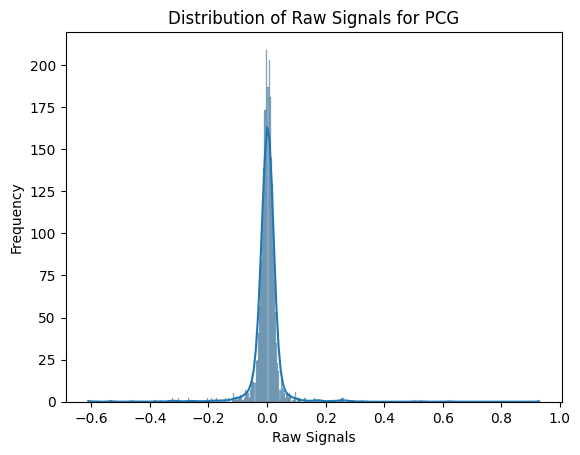

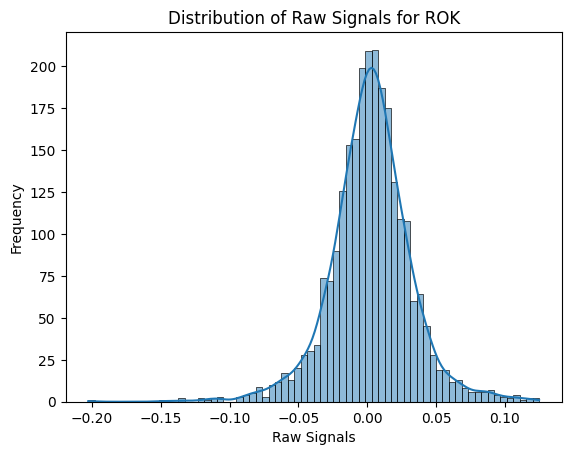

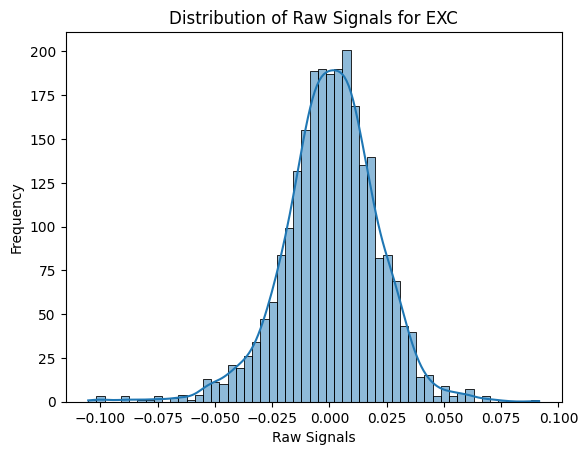

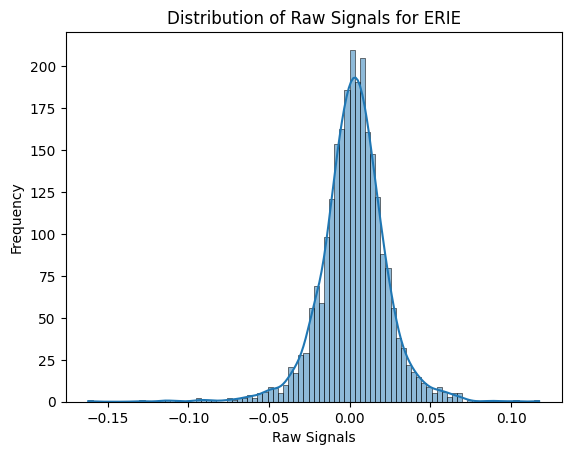

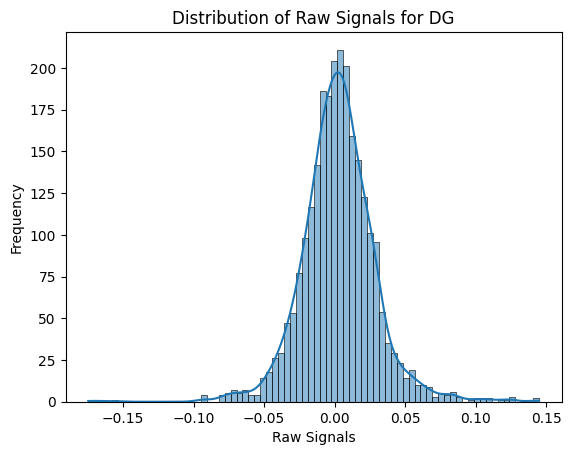

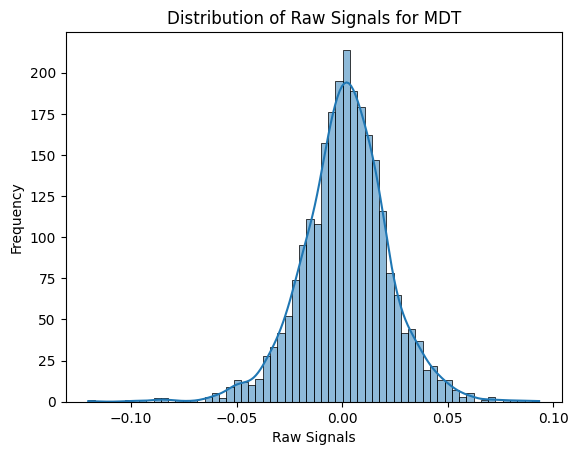

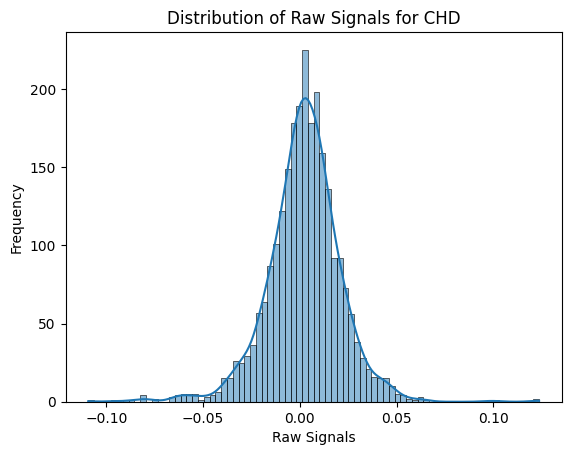

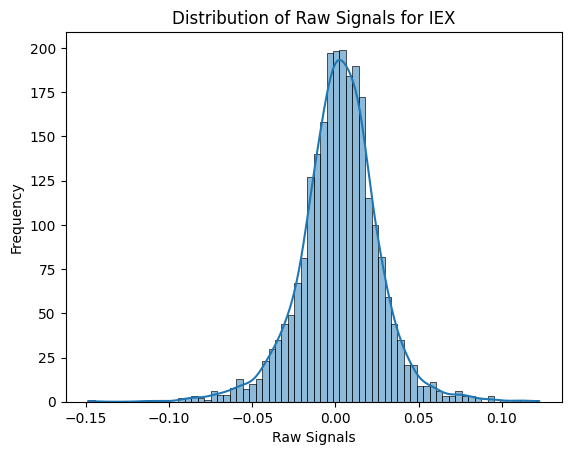

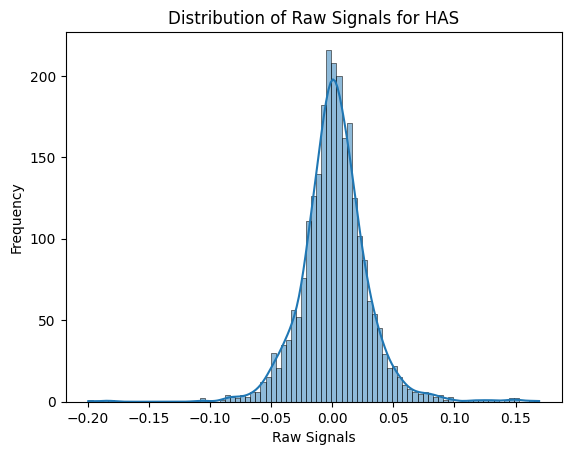

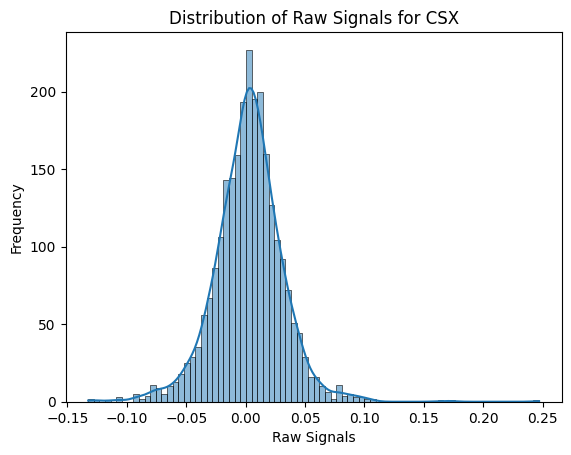

In [ ]:
import seaborn as sns
random_tickers = random.sample(list(groups.groups.keys()), 10)
for ticker in random_tickers:
  plt.figure()  # Create a new figure for each ticker
  sns.histplot(groups.get_group(ticker)['Raw Signals'], kde=True)  # Plot distribution with kernel density estimation
  plt.title(f'Distribution of Raw Signals for {ticker}')
  plt.xlabel('Raw Signals')
  plt.ylabel('Frequency')
  plt.show()

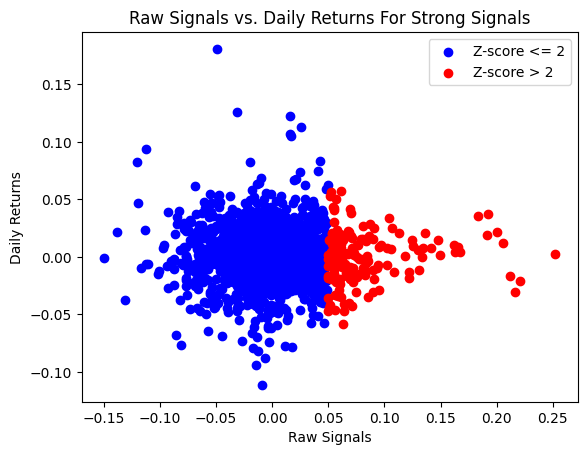

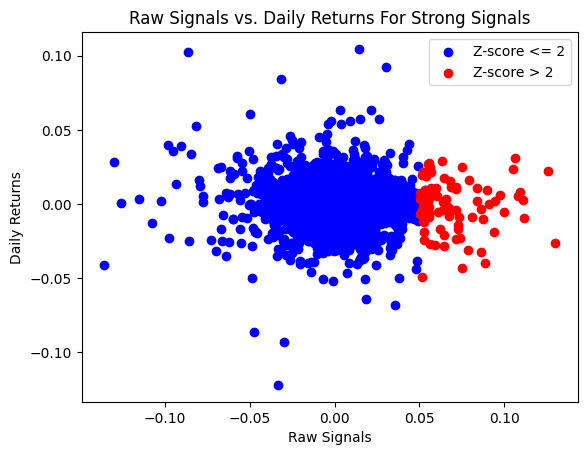

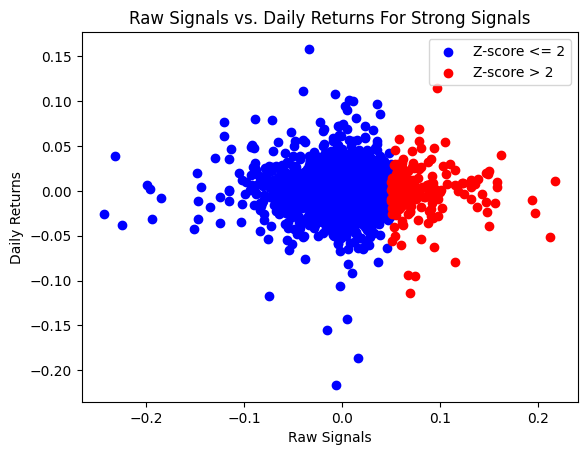

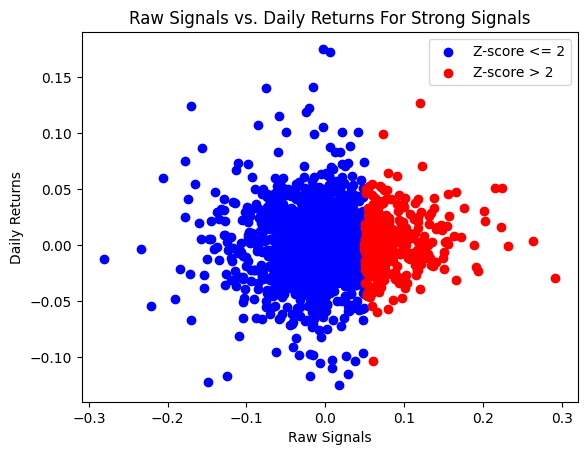

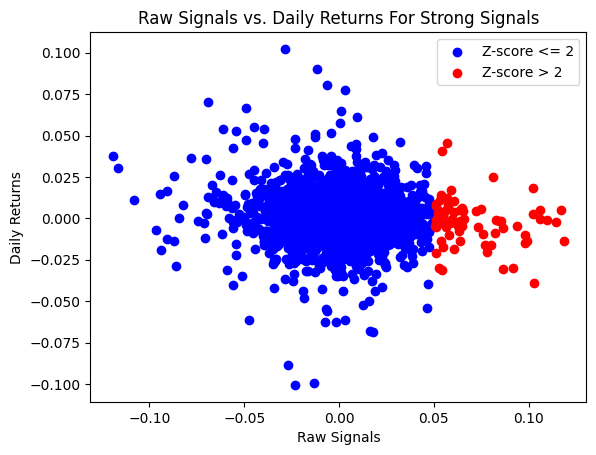

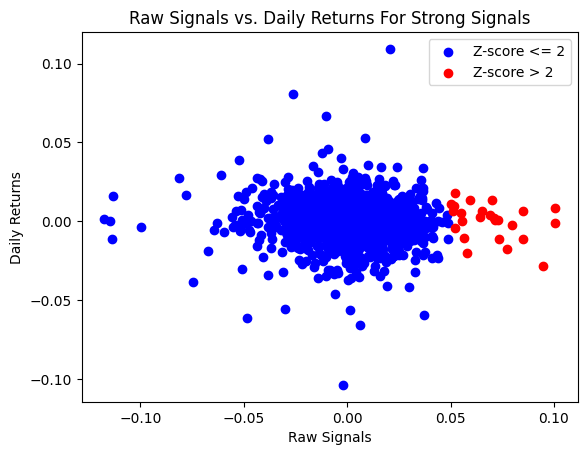

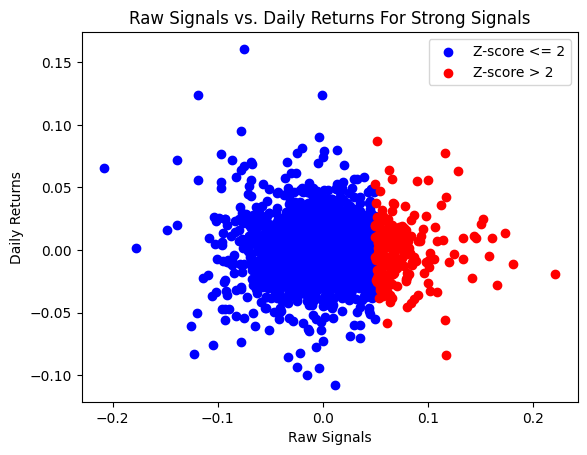

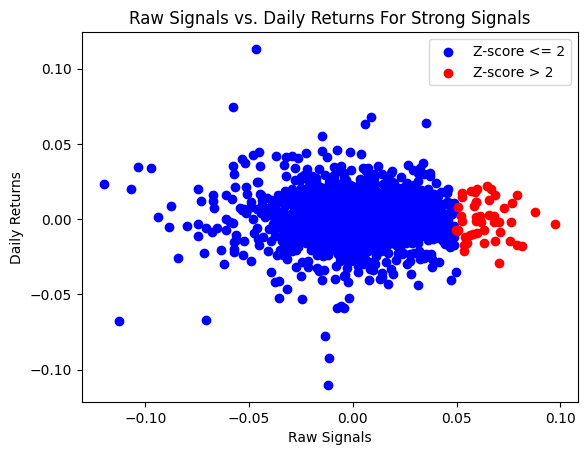

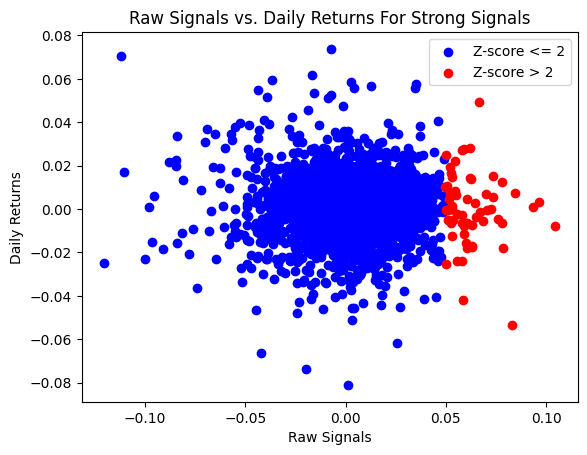

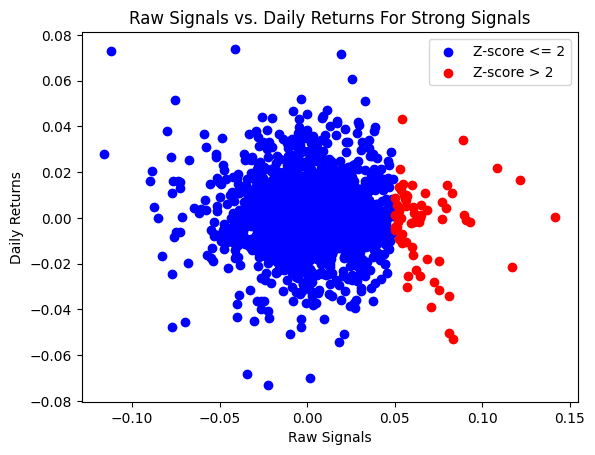

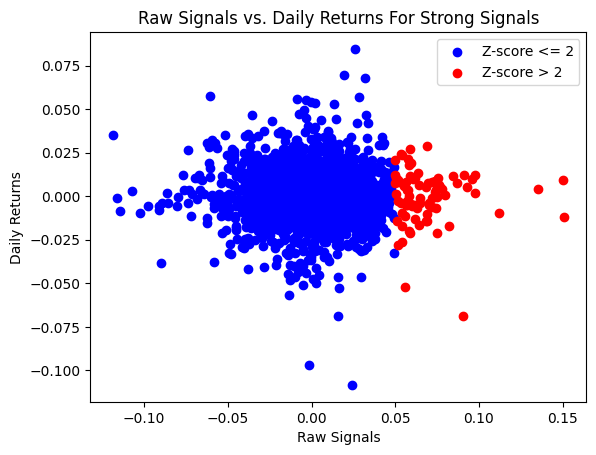

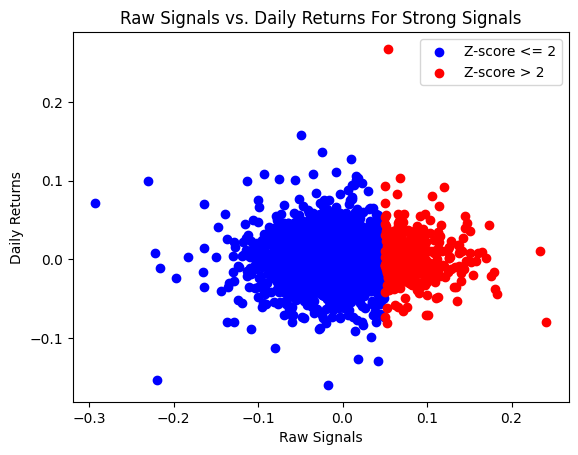

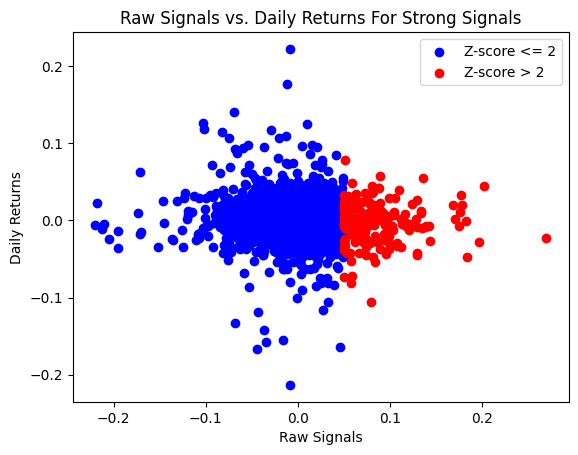

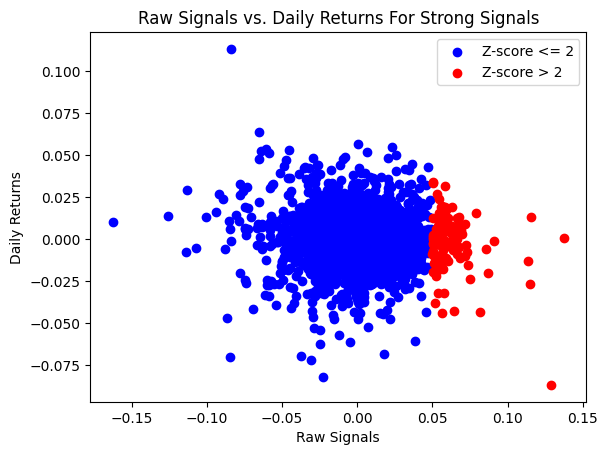

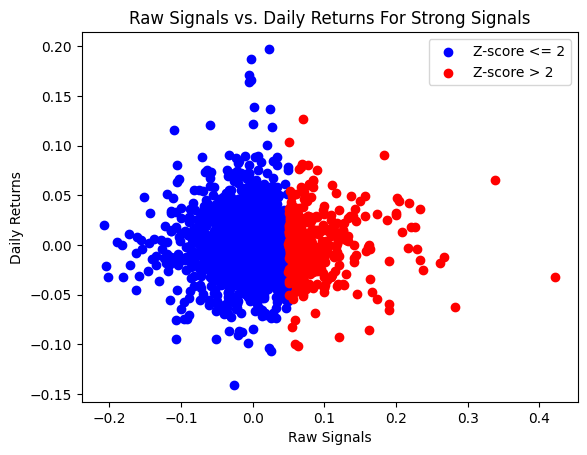

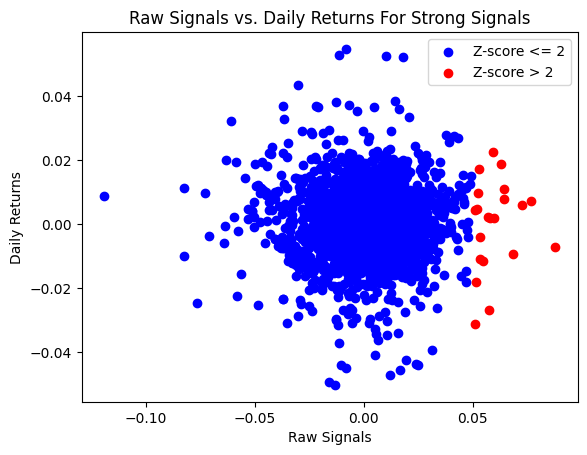

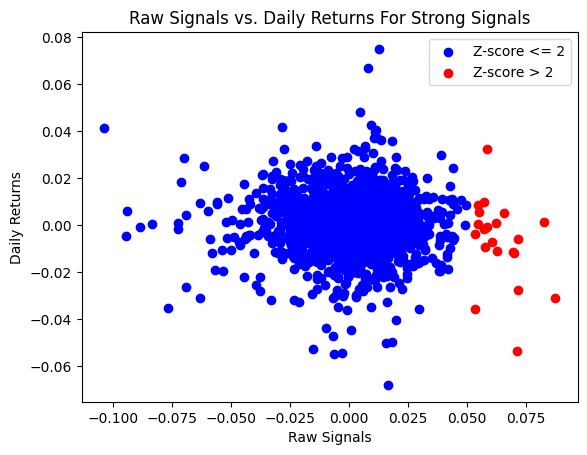

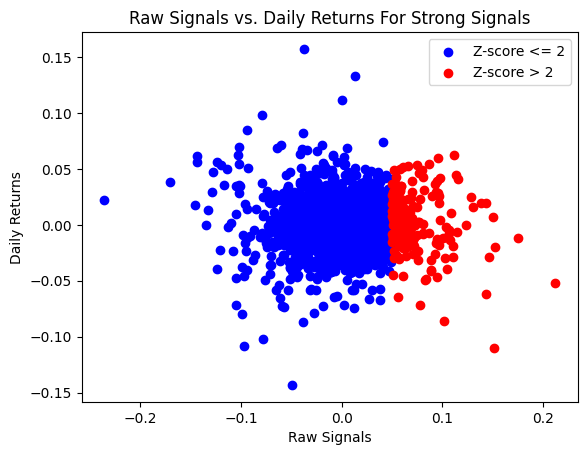

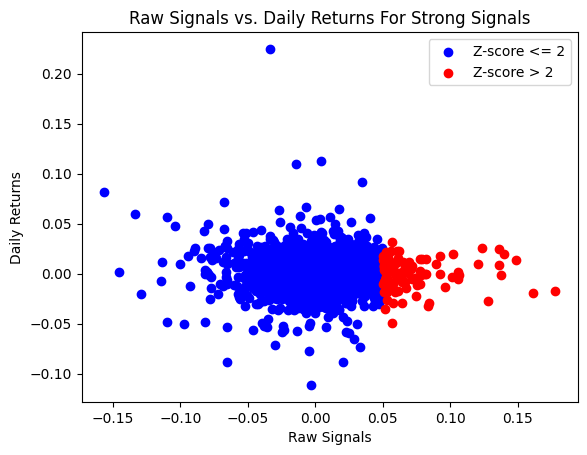

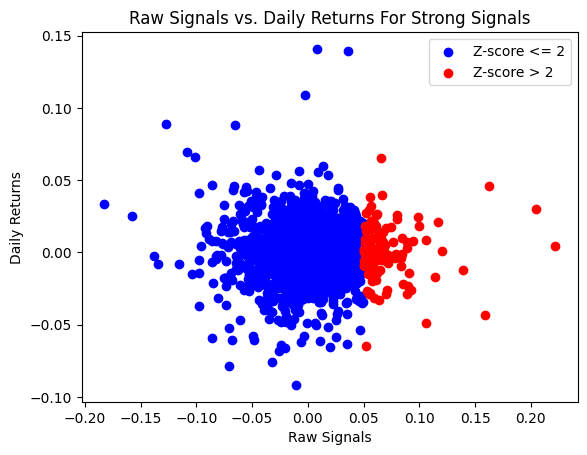

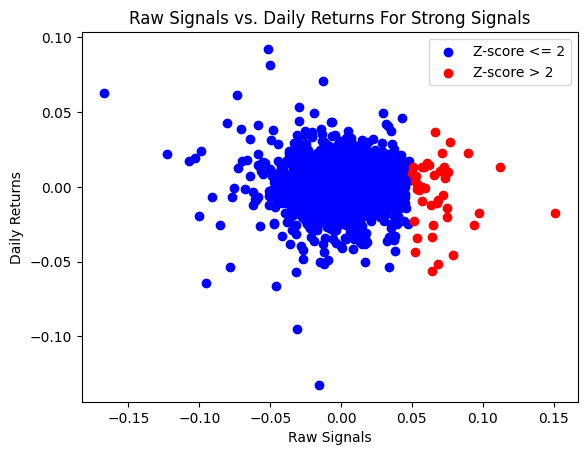

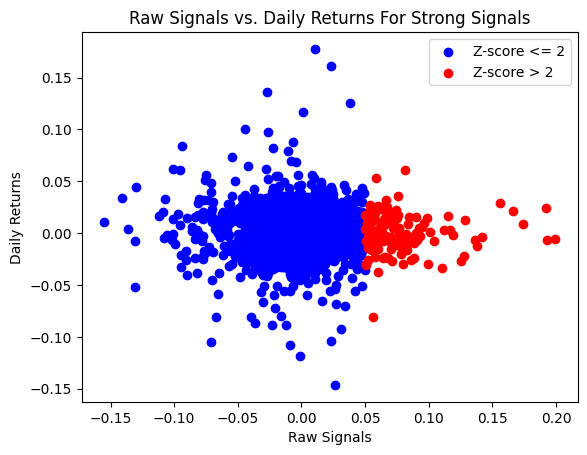

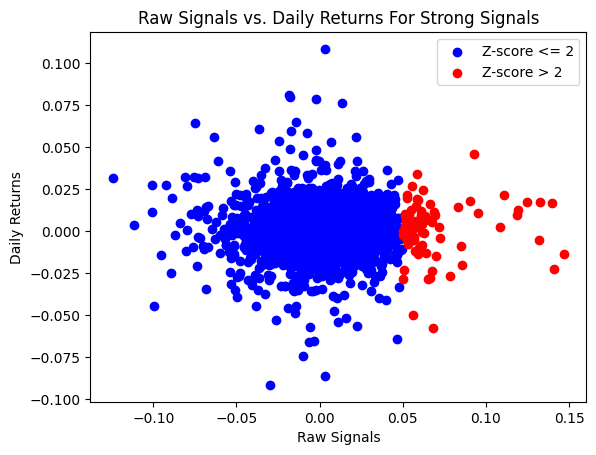

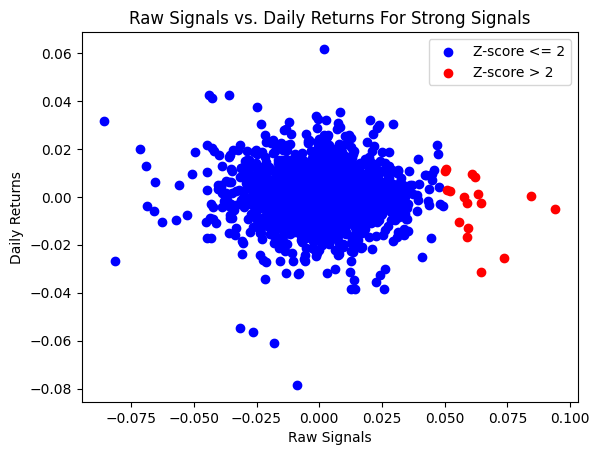

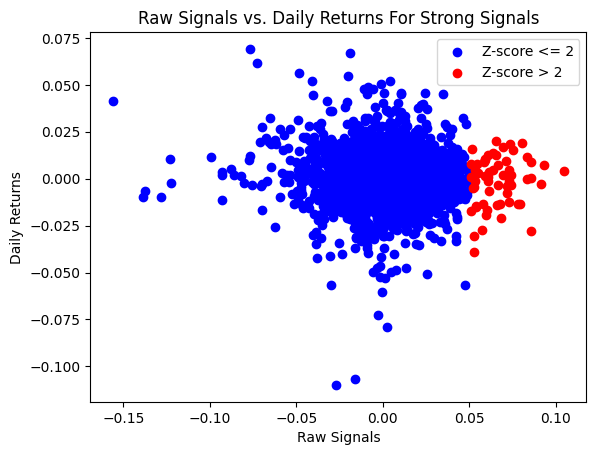

In [ ]:
df['z_score'] = (df['Raw Signals'] - df['Raw Signals'].mean()) / df['Raw Signals'].std()
groups = df.groupby('ticker')
random_tickers = random.sample(list(groups.groups.keys()), 25)
for ticker in random_tickers:
  plt.scatter(groups.get_group(ticker)[groups.get_group(ticker)['z_score'] <= 1.6]['Raw Signals'], groups.get_group(ticker)[groups.get_group(ticker)['z_score'] <= 1.6]['Daily Returns'], color='blue', label='Z-score <= 2')
  plt.scatter(groups.get_group(ticker)[groups.get_group(ticker)['z_score'] > 1.6]['Raw Signals'], groups.get_group(ticker)[groups.get_group(ticker)['z_score'] > 1.6]['Daily Returns'], color='red', label='Z-score > 2')
  plt.title(f'Raw Signals vs. Daily Returns For Strong Signals')
  plt.xlabel('Raw Signals')
  plt.ylabel('Daily Returns')
  plt.legend()
  plt.show()

In [ ]:
filtered_df = df[df['z_score'] > 1.6]
z_filtered_groups = filtered_df.groupby('ticker')
positive_return_percentage_zscore = []

for group, group_df in z_filtered_groups:
  n_positive = len(group_df['Daily Returns'][group_df['Daily Returns'] > 0])  # Filter for positive returns within the group
  n = len(group_df)
  pct_positive_returns = n_positive / n
  iteration = {"Ticker": group, "Number of Observations": n, "Pct Positive Returns": pct_positive_returns}
  positive_return_percentage_zscore.append(iteration)

percent_pos_returns_by_zscore_df = pd.DataFrame(positive_return_percentage_zscore)
percent_pos_returns_by_zscore_df

plt.scatter(percent_pos_returns_by_zscore_df['Number of Observations'], percent_pos_returns_by_zscore_df['Pct Positive Returns'])
plt.title("Number of Observations vs. Percent Positive Returns")
plt.xlabel("Number of Observations")
plt.ylabel("Percent Positive Returns")
plt.show()

NameError: name 'df' is not defined

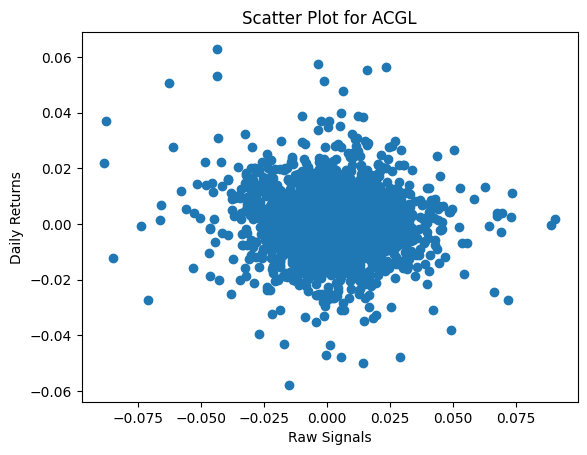

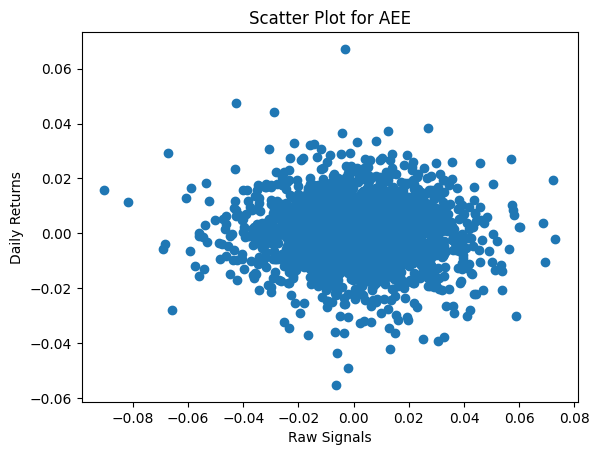

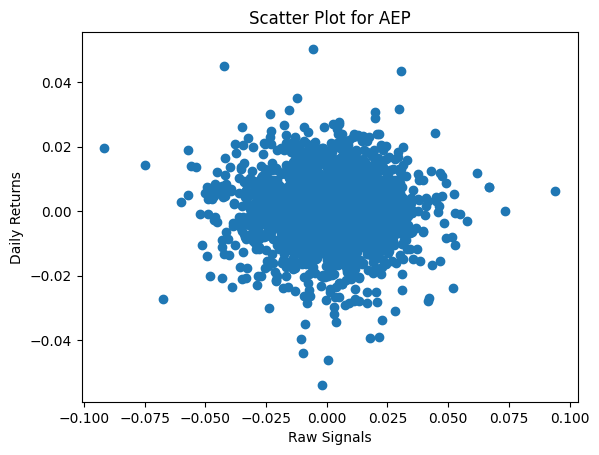

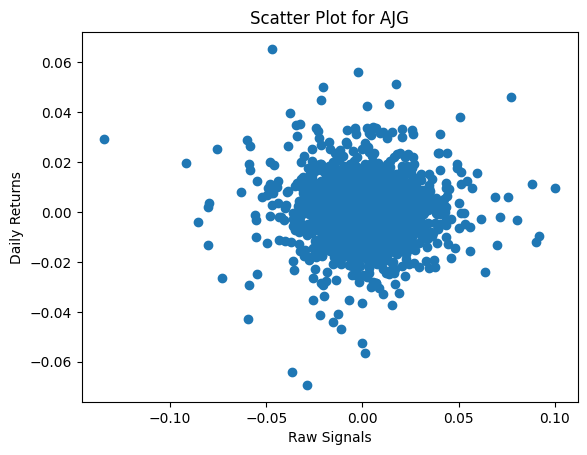

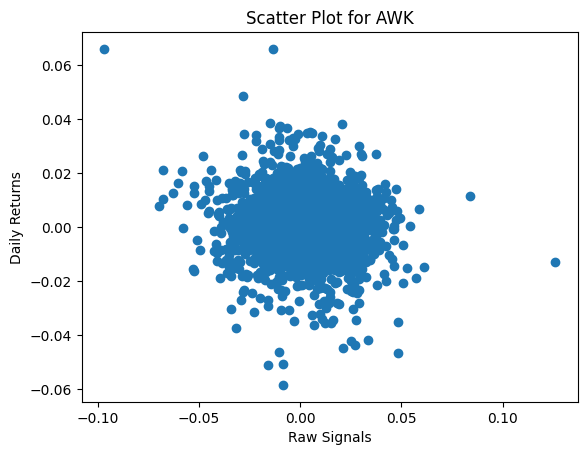

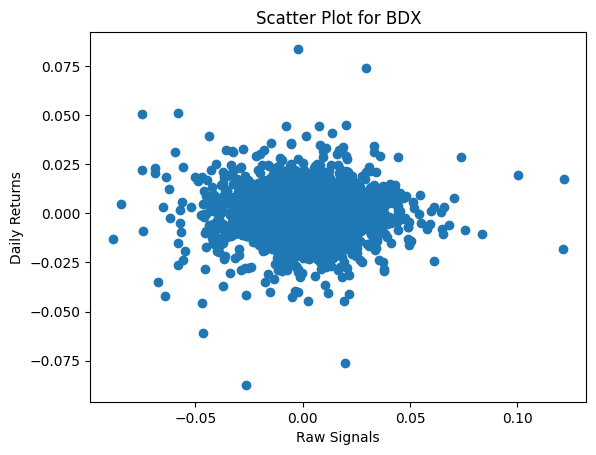

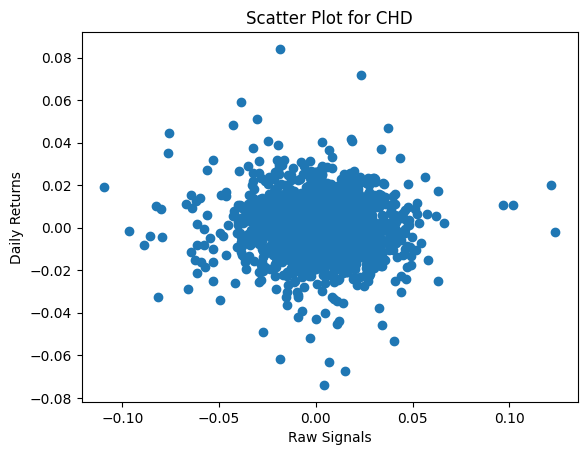

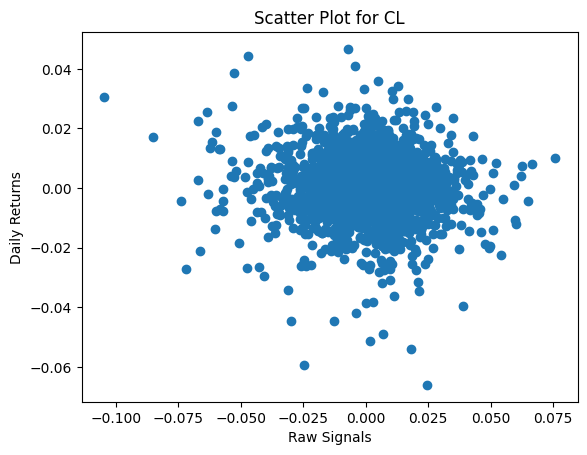

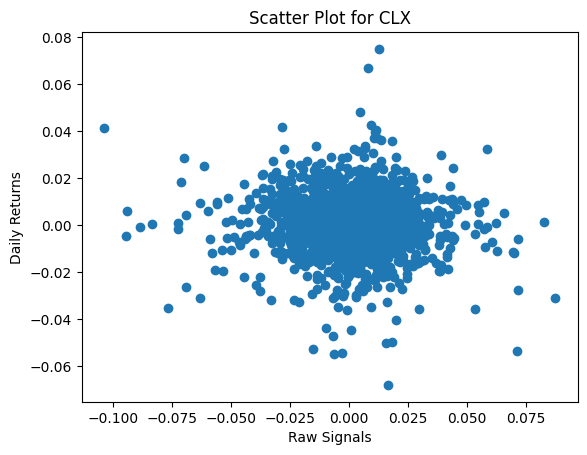

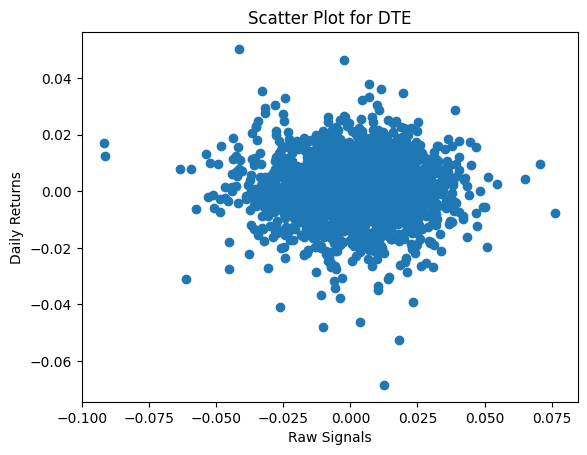

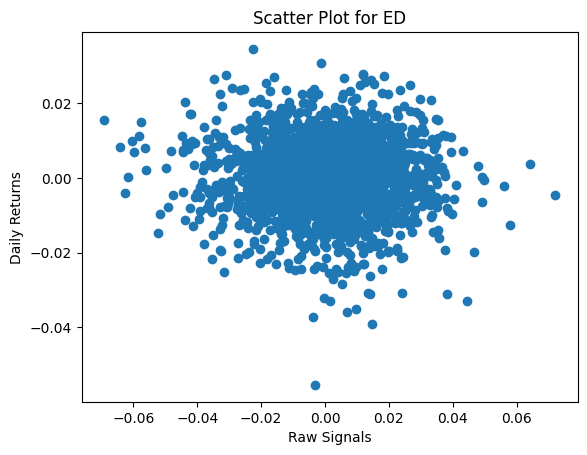

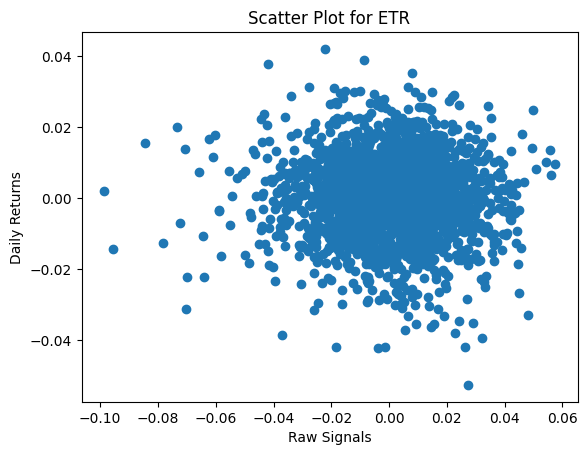

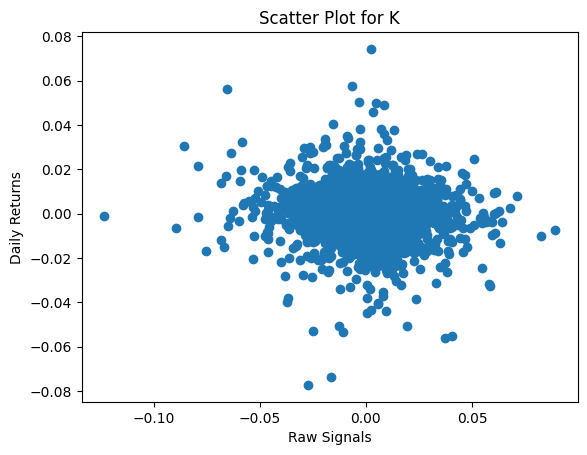

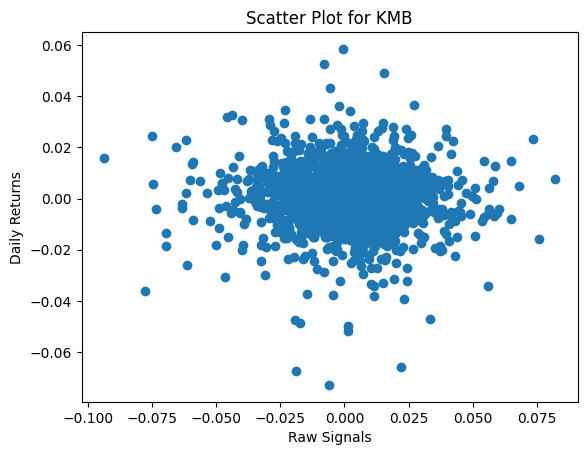

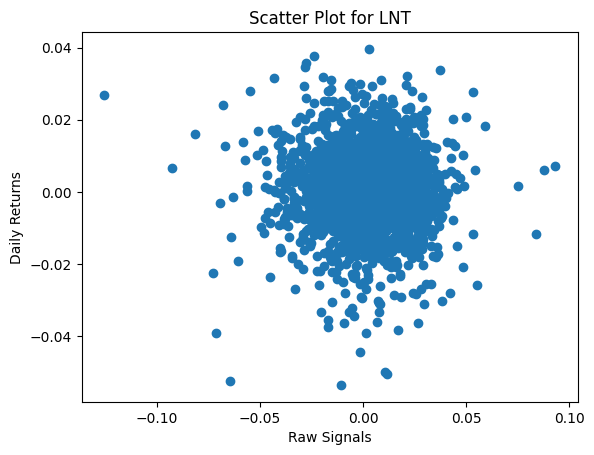

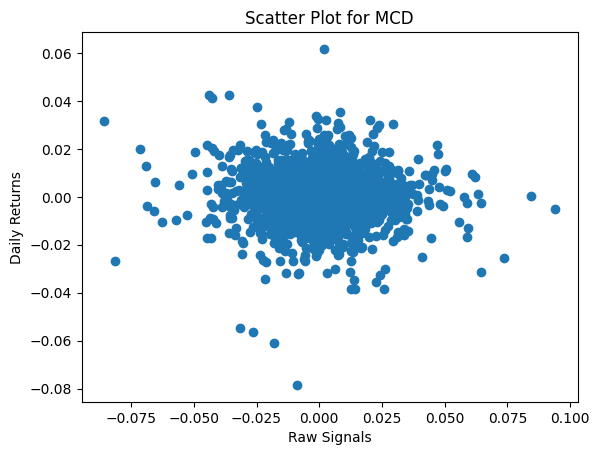

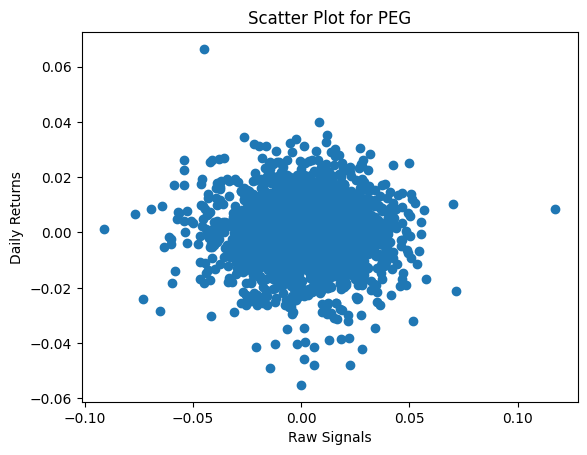

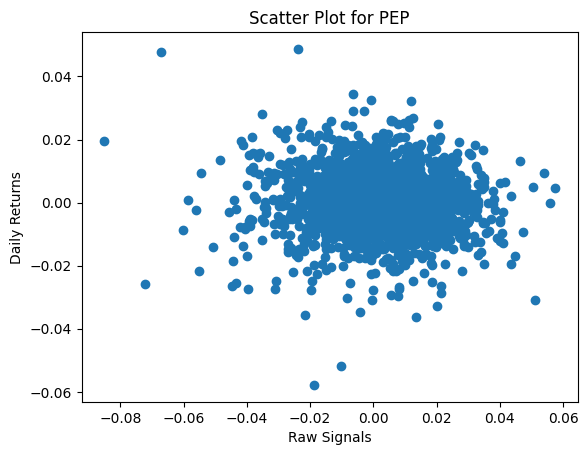

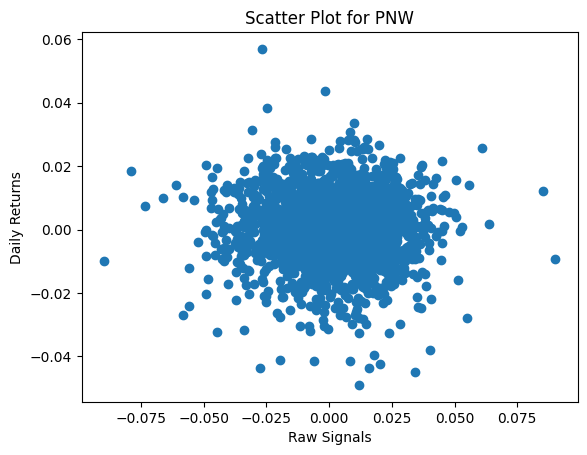

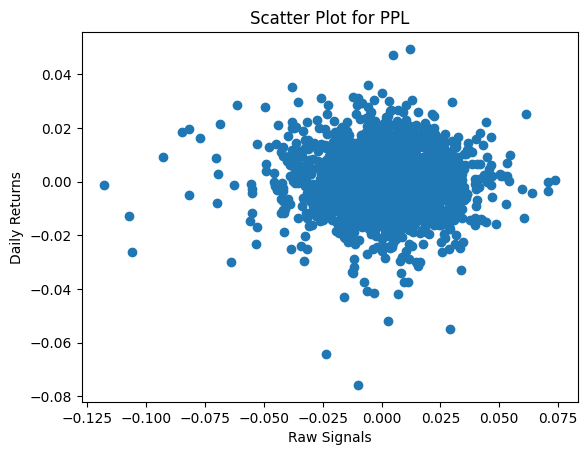

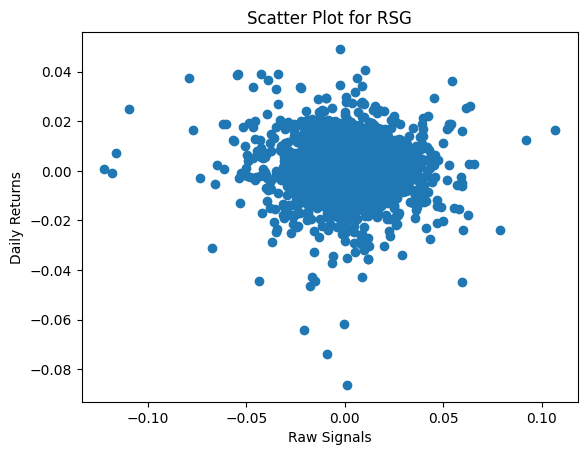

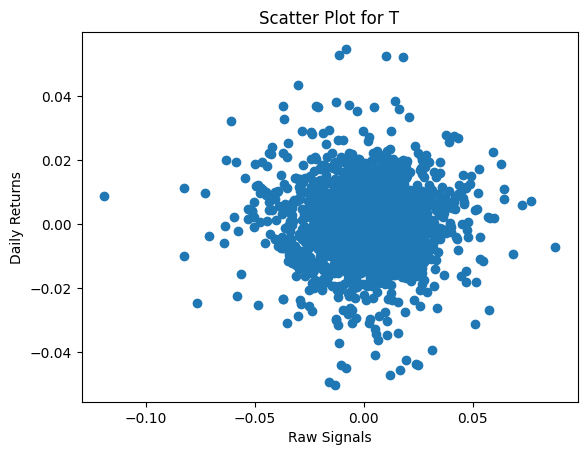

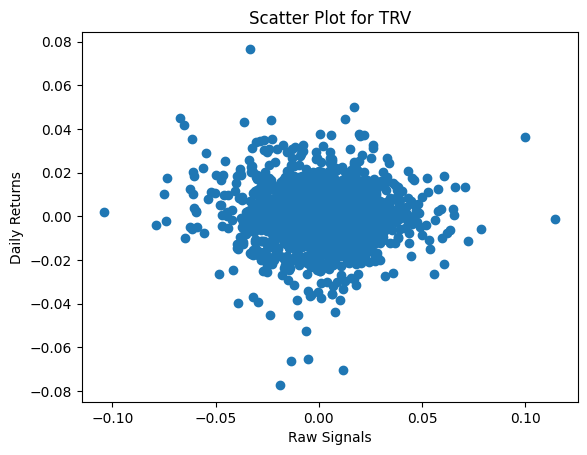

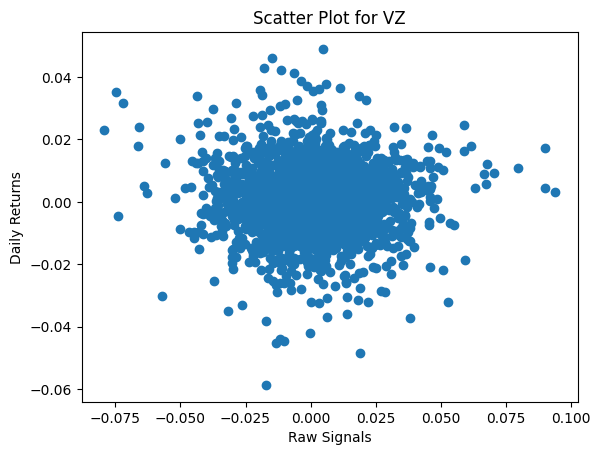

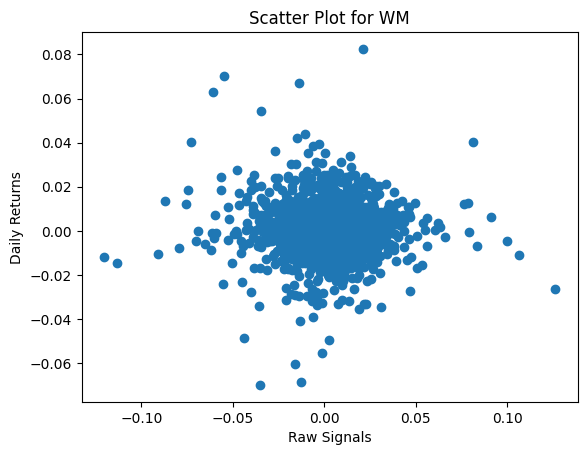

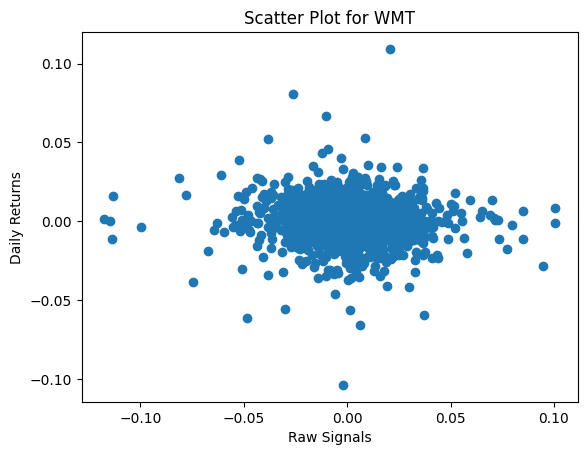

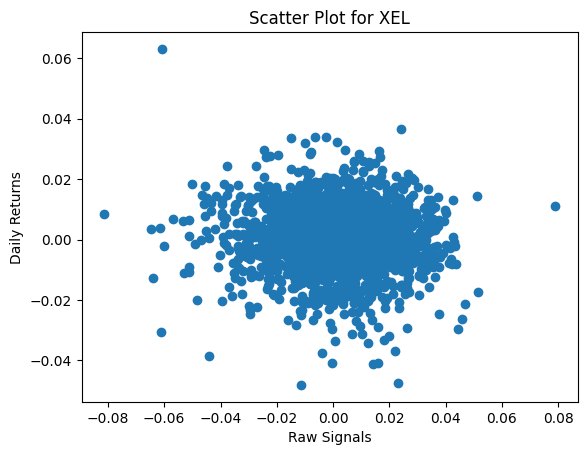

In [ ]:
mse_df = pd.DataFrame.from_dict(group_mse_dict, orient='index', columns=['MSE'])
quantile = np.quantile(mse_df['MSE'], 0.1)
lowest_mse = mse_df[mse_df['MSE'] < quantile]
lowest_mse_tickers = lowest_mse.index
filtered_df = df[df['ticker'].isin(lowest_mse_tickers)]
for ticker, group in filtered_df.groupby('ticker'):
    plt.figure()
    plt.scatter(group['Raw Signals'], group['Daily Returns'])
    plt.title(f'Scatter Plot for {ticker}')
    plt.xlabel('Raw Signals')
    plt.ylabel('Daily Returns')
    plt.show()

In [ ]:
def fit_ridge_regression(X, y, alpha):
    N, d = X.shape
    y = y.reshape(-1)

    def obj(w):
        preds = X @ w
        mse = np.sum((y - preds)**2) / N
        l2_penalty = alpha * np.sum(w**2)
        return mse + l2_penalty

    w0 = np.zeros(d)

    result = minimize(obj, w0, method='BFGS')

    return result.x

In [ ]:
def ridge_closed_form(X, y, alpha):
    N, d = X.shape
    I = np.eye(d)
    return np.linalg.solve(X.T @ X + alpha * I, X.T @ y)

In [ ]:
X =  df.iloc[:, 2:].values
y = df['Daily Returns'].values
alpha = 0.01
weights = ridge_closed_form(X, y, alpha)
weights

array([ 3.95515325e-04,  1.11981230e-03,  7.32870351e-04,  1.03202191e-03,
        3.45271814e-04,  7.74976179e-04,  6.29012129e-04,  5.96458960e-04,
        3.72329656e-04,  7.49235843e-04,  7.71294159e-04,  7.37935151e-04,
        4.96462312e-04,  8.40967266e-04,  1.26867679e-03,  7.61080896e-04,
        7.95537838e-04,  1.26710895e-03,  8.27817822e-04,  7.98064620e-04,
        9.46659687e-04,  6.36259286e-04,  7.58102283e-04,  5.79313040e-04,
        1.44353229e-03,  8.30941461e-04,  1.45575351e-03,  9.11120140e-04,
        8.90660678e-04,  7.67611919e-04,  7.24336020e-04,  6.30507823e-04,
        9.11813541e-05,  1.13034604e-04,  3.89841287e-04,  1.09437622e-03,
        2.03353516e-04,  1.36954646e-03,  5.18540240e-04,  5.92957659e-04,
        8.58977215e-04,  7.19468332e-04,  8.08552087e-04,  9.14779277e-04,
        4.68675306e-04,  5.26925930e-04,  4.50557440e-04,  3.87212653e-04,
        6.23532450e-04,  7.76548644e-04,  6.76499199e-04,  4.18644711e-04,
        7.14120614e-04,  

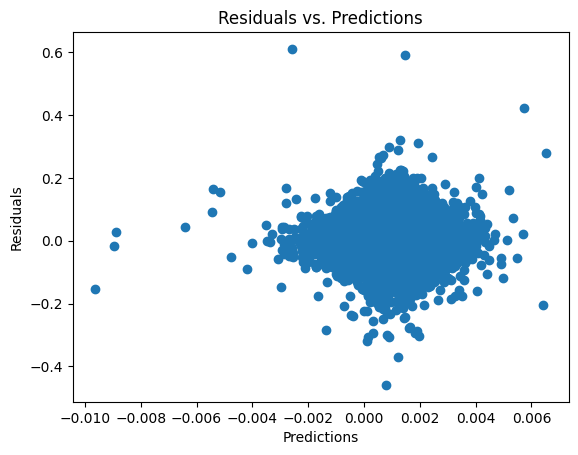

In [ ]:
preds = X @ weights
residuals = y - preds
plt.scatter(preds, residuals)
plt.title("Residuals vs. Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [ ]:
df.insert(3, 'Ridge Residuals', residuals)
df.insert(4, 'Ridge Predictions', preds)

In [ ]:
df

,ticker,Daily Returns,Raw Signals,Ridge Residuals,Ridge Predictions,Ridge Residuals,Ridge Predictions,AAPL,ACGL,ADBE,...,WMB,WMT,WSM,WST,WTW,WY,WYNN,XEL,YUM,z_score
0,EA,0.015951,-0.006061,0.014940,0.001011,0.014940,0.001011,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.275492
1,DTE,0.017334,-0.016307,0.016504,0.000830,0.016504,0.000830,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.620299
2,CNP,-0.002093,-0.007576,-0.002685,0.000592,-0.002685,0.000592,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.326487
3,MOH,0.014776,0.054270,0.014144,0.000632,0.014144,0.000632,0,0,0,...,0,0,0,0,0,0,0,0,0,1.754701
4,WST,0.011701,-0.019255,0.010502,0.001199,0.010502,0.001199,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.719480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677965,KMB,-0.005733,0.008031,-0.006181,0.000448,-0.006181,0.000448,0,0,0,...,0,0,0,0,0,0,0,0,0,0.198712
677966,CCI,0.005402,0.003557,0.004740,0.000662,0.004740,0.000662,0,0,0,...,0,0,0,0,0,0,0,0,0,0.048141
677967,SYK,-0.011754,-0.009363,-0.012533,0.000779,-0.012533,0.000779,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.386611
677968,AJG,-0.000211,0.005198,-0.000951,0.000740,-0.000951,0.000740,0,0,0,...,0,0,0,0,0,0,0,0,0,0.103389


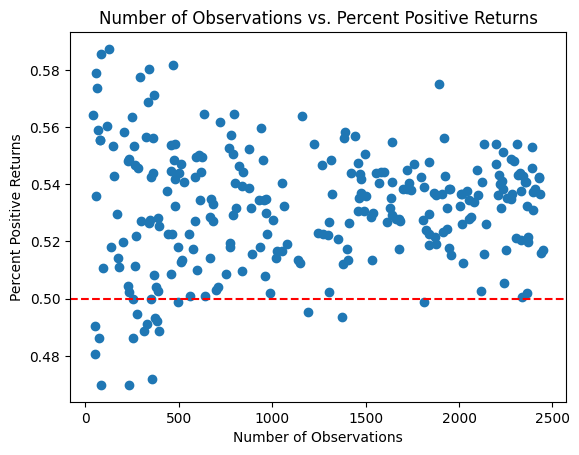

In [ ]:
df['z_score'] = (df['Ridge Predictions'] - df['Ridge Predictions'].mean()) / df['Ridge Predictions'].std()
filtered_df = df[df['z_score'] > 0]
z_filtered_groups = filtered_df.groupby('ticker')
positive_return_percentage_zscore = []

for group, group_df in z_filtered_groups:
  n_positive = len(group_df['Daily Returns'][group_df['Daily Returns'] > 0])  # Filter for positive returns within the group
  n = len(group_df)
  pct_positive_returns = n_positive / n
  iteration = {"Ticker": group, "Number of Observations": n, "Pct Positive Returns": pct_positive_returns}
  positive_return_percentage_zscore.append(iteration)

percent_pos_returns_by_zscore_df = pd.DataFrame(positive_return_percentage_zscore)
percent_pos_returns_by_zscore_df

plt.scatter(percent_pos_returns_by_zscore_df['Number of Observations'], percent_pos_returns_by_zscore_df['Pct Positive Returns'])
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title("Number of Observations vs. Percent Positive Returns")
plt.xlabel("Number of Observations")
plt.ylabel("Percent Positive Returns")
plt.show()

In [ ]:
agg = df[df['z_score']>1.6]['Daily Returns']
print("Mean next-day return =", agg.mean(),
      "t-stat =", agg.mean()/agg.std(ddof=1)*np.sqrt(len(agg)))

Mean next-day return = 0.0021700999888994653 t-stat = 15.340316819858428


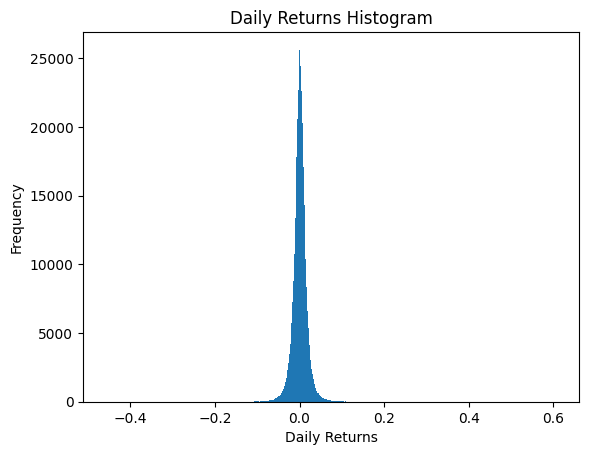

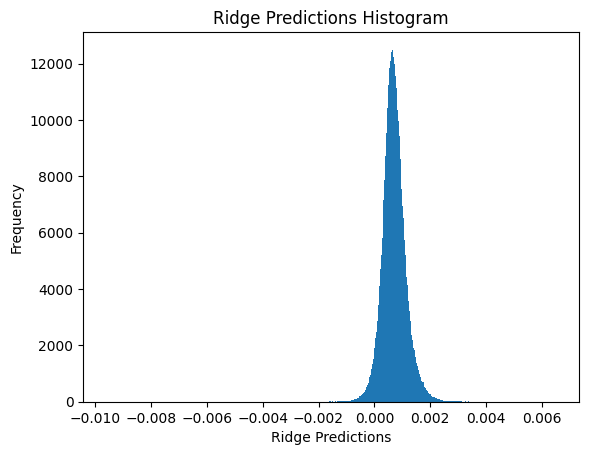

In [ ]:
plt.hist(df['Daily Returns'], bins=1000)
plt.title("Daily Returns Histogram")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()
plt.hist(df['Ridge  Predictions'], bins=1000)
plt.title("Ridge Predictions Histogram")
plt.xlabel("Ridge Predictions")
plt.ylabel("Frequency")
plt.show()

In [ ]:
np.corrcoef(y, preds)[0, 1]

np.float64(0.02476317630854665)

Text(0, 0.5, 'Actual Return')

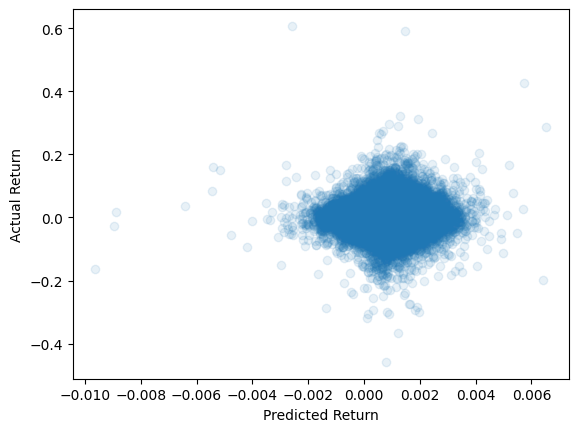

In [ ]:
plt.scatter(preds, y, alpha=0.1)
plt.xlabel("Predicted Return")
plt.ylabel("Actual Return")

<Axes: title={'center': 'Mean Return by Prediction Decile'}, xlabel='quantile'>

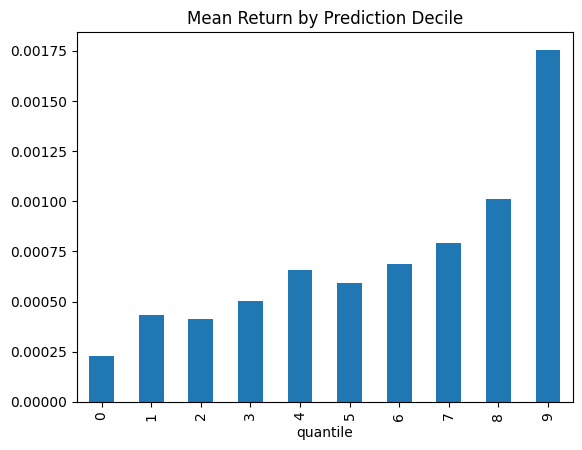

In [ ]:
df = pd.DataFrame({'y_pred': preds, 'y_true': y})
df['quantile'] = pd.qcut(df['y_pred'], 10, labels=False)

# Average return by quantile
avg_returns = df.groupby('quantile')['y_true'].mean()
avg_returns.plot(kind='bar', title="Mean Return by Prediction Decile")

In [ ]:
signals = np.random.rand(50,)
top_decile = np.quantile(signals, 0.9)
signals = np.where(signals > top_decile, signals, 0)
signals

array([0.        , 0.        , 0.84629819, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.94314881, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.91279234, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.90286811, 0.889132  , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
def train_linear_signal_model(close, open, n_signal):

  tickers = close.columns.str.split('_').str[1].unique()
  betas = []

  daily_returns = open.pct_change()
  daily_returns = daily_returns[n_signal+2:]
  daily_raw_signal = (close - close.shift(n_signal))/close.shift(n_signal)
  daily_raw_signal.dropna(inplace=True)
  daily_raw_signal = daily_raw_signal[:-2]

  for ticker in tickers:
    lm = sm.OLS(daily_returns[f"Open_{ticker}"].values, daily_raw_signal[f"Close_{ticker}"].values)
    results = lm.fit_regularized()
    betas.append(results.params)

  betas = np.concatenate(betas)

  return betas

In [ ]:
def top_quantile_signals(signals, quantile=0.9):
  top_quantile = np.quantile(signals, 0.9)
  signals = np.where(signals > top_quantile, signals, 0)
  return signals

In [ ]:
def get_next_weights(last_close, n_signal_ago_close, beta, filter_quantile):
    scales = ((last_close - n_signal_ago_close) / n_signal_ago_close)
    signals = np.maximum(beta*scales, 0)
    signals = top_quantile_signals(signals, filter_quantile)
    if np.sum(signals) > 0:
      weights = signals / np.sum(signals)
    else:
      weights = np.zeros(len(signals))
    return weights

In [ ]:
def get_prices(i, data, tickers, n_signal, n_days_holding, vol_window):
    close_cols = [f"Close_{ticker}" for ticker in tickers]
    open_cols  = [f"Open_{ticker}" for ticker in tickers]
    opens_last_traded = (data[open_cols].iloc[i - n_days_holding]).to_numpy()
    opens_today = (data[open_cols].iloc[i]).to_numpy()
    opens_yesterday = (data[open_cols].iloc[i - 1]).to_numpy()
    last_close_prices = (data[close_cols].iloc[i-1]).to_numpy()
    past_prices = (data[close_cols].iloc[(i - 1) - n_signal]).to_numpy()
    volatility = np.std(data[close_cols].iloc[(i - 1) - vol_window:i], axis=0)
    return opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility

In [ ]:
download_historical_data_to_csv(500, "2010-01-01", "2025-01-01")
historical_data = pd.read_csv("historical_data.csv", index_col=0, parse_dates=True)
train = historical_data[historical_data.index < "2020-01-01"]
test = historical_data[historical_data.index >= "2020-01-01"]

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HST']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IRM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


KeyboardInterrupt: 

In [ ]:
historical_data = sp500
train = historical_data[historical_data.index < "2015-01-01"]
test = historical_data[historical_data.index >= "2015-01-01"]

In [ ]:
def backtest_strategy_long_only(data, window=60, n_signal=20, n_days_holding =20, target_pct=0.8, filter_quantile = 0.75, vol_window = 20, cost_per_unit=0.0005, slippage_rate=0.003, threshold=0.02, initial_cash=100000):

    tickers = data.columns.str.split('_').str[1].unique()
    close_cols = [f"Close_{ticker}" for ticker in tickers]
    open_cols  = [f"Open_{ticker}" for ticker in tickers]

    returns = []
    initial_cash = initial_cash
    cash = initial_cash
    invested_value = 0.0
    scale = 1.0
    cumulative_return = 1.0
    positions = []
    initial_position = np.zeros(len(tickers))
    positions.append(initial_position)
    #prev_positions = np.zeros(len(tickers))
    cumulative_cost = 0.0
    daily_pnl = 0.0
    portfolio_value = cash + invested_value
    portfolio_values = []
    cash_values = []
    dates = []
    deposits = []
    scales_list = []
    #positions_list = []
    num_valid_assets = []
    coeffs =[]
    m = 1
    win_rate = 1.0
    cum_wins = 0
    cum_trades = 0
    cum_win_rate = 0.0
    cum_sum_win = 0.0
    cum_sum_loss = 0.0
    cum_num_win = 0
    cum_num_loss = 0
    cumulative_win_rates = []

    for i in range(window + 1, len(data) - 1):

        daily_pnl = 0.0

        if i == m*(window + 1):
          beta = train_linear_signal_model(data[close_cols].iloc[:i-1], data[open_cols].iloc[:i-1], n_signal)
          m += 1

        if i == window + 1:

          #SINCE THIS IS THE FIRST ITERATION WE ARE SIMPLY TAKING A POSITION AND WILL CALCULATE THE RETURNS FROM THIS POSITION IN THE NEXT ITERATION WHERE TRADING OCCURS
          opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = get_prices(i, data, tickers, n_signal, n_days_holding, vol_window)
          weights = get_next_weights(last_close_prices, past_prices, beta, filter_quantile)
          dollar_alloc = target_pct * portfolio_value * weights
          position = (dollar_alloc / opens_today) / volatility
          positions.append(position)

          delta_positions = np.abs(position - initial_position)
          turnover_dollars = np.sum(delta_positions * opens_today)
          first_trade_cost =  cost_per_unit * turnover_dollars
          first_trade_slippage = slippage_rate * turnover_dollars
          portfolio_value -= first_trade_cost + first_trade_slippage

          portfolio_values.append(portfolio_value)
          date = data.index[i]
          dates.append(date)
          first_return = 0
          returns.append(first_return)

        else:

          should_rebalance = (i - (window + 1)) % n_days_holding == 0
          if should_rebalance:

            #IN FURTHER ITERATIONS WHERE TRADING OCCURS WE WILL NOW BEGIN BY PULLING THE RELEVANT PRICE DATA AND CALCULATING RETURNS FROM OUR PREVIOUS POSITIONS
            opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = get_prices(i, data, tickers, n_signal, n_days_holding, vol_window)
            returns_past_day = (opens_today - opens_yesterday) / opens_yesterday
            daily_pnl = np.sum(positions[-1] * opens_yesterday * returns_past_day)
            portfolio_value += daily_pnl

            #beta = train_linear_signal_model(data[close_cols].iloc[:i-1], data[open_cols].iloc[:i-1], n_signal)
            weights = get_next_weights(last_close_prices, past_prices, beta, filter_quantile)
            dollar_alloc = target_pct * portfolio_value * weights
            position = (dollar_alloc / opens_today) / volatility
            positions.append(position)

            delta_positions = np.abs(positions[-1] - positions[-2])
            cost_of_new_trades = cost_per_unit * np.sum(delta_positions)
            slippage = slippage_rate * np.sum(delta_positions * opens_today)
            #daily_pnl += np.sum(positions[-2] * opens_yesterday * returns_past_day) - (cost_of_new_trades + slippage)
            portfolio_value -= (cost_of_new_trades + slippage)
            returns_pct = (portfolio_value / portfolio_values[-1]) - 1
            cumulative_return *= (1 + returns_pct)

            #NOW WE WILL GENERATE A NEW POSITION TO TAKEN TODAY AT OPEN

            portfolio_values.append(portfolio_value)
            date = data.index[i]
            dates.append(date)
            returns.append(returns_pct)


          else:
            opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = get_prices(i, data, tickers, n_signal, n_days_holding, vol_window)
            returns_past_day = (opens_today - opens_yesterday) / opens_yesterday
            daily_pnl = np.sum(positions[-1] * opens_yesterday * returns_past_day)
            returns_pct = daily_pnl / portfolio_value
            portfolio_value += daily_pnl
            portfolio_values.append(portfolio_value)
            date = data.index[i]
            dates.append(date)
            returns.append(returns_pct)

    rf_daily = get_risk_free_returns_data(data.index[0], data.index[-1], dates)
    returns = np.array(returns)
    excess_returns = returns - rf_daily.values
    sharpe_daily = np.mean(excess_returns) / np.std(returns, ddof=1)
    sharpe_annualized = sharpe_daily * np.sqrt(252)

    #expectancy = (cum_win_rate * cum_avg_win) - ((1 - cum_win_rate) * cum_avg_loss)
    #print(f"Expectancy: ", expectancy)
    #print(f"Cumulative Cost: ", cumulative_cost)

    portfolio_values = pd.DataFrame(portfolio_values, index=dates)
    print(f"Final portfolio value: ", portfolio_value)
    #print(f"Final cash: ", cash)
    #print(f"Final invested value: ", invested_value)
    cumulative_returns = np.cumprod([1 + r for r in returns])
    #print(cum_win_rate)
    return returns, cumulative_returns, dates, sharpe_annualized, positions, portfolio_values, cash_values

returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(train)
spy = benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 100000)

# Print or plot results as needed
print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

Final portfolio value:  446277289.5650536


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


IndexError: index 0 is out of bounds for axis 0 with size 0

[*********************100%***********************]  1 of 1 completed

Final portfolio value:  136579.56836179981
Returns: [ 0.         -0.00712864 -0.00427584 ...  0.00075028  0.00031258
 -0.00116159]
Cumulative Returns: [1.         0.99287136 0.988626   ... 1.36778103 1.36820856 1.36661926]
Sharpe Ratio: nan


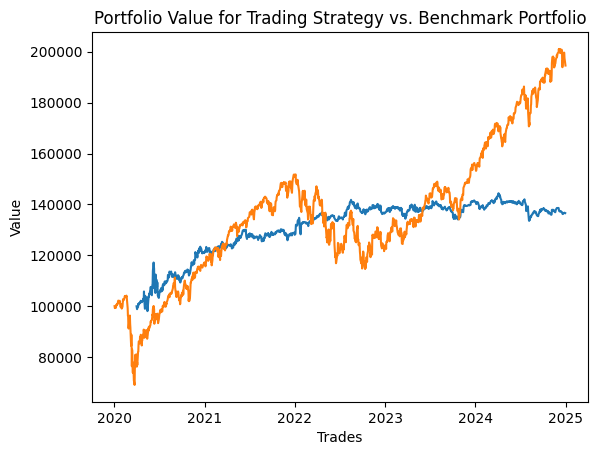

In [ ]:
returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(test)
spy = benchmark_portfolio_performance("SPY", "2020-01-01", "2025-01-01", 100000)

# Print or plot results as needed
print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

In [ ]:
class Backtest:
    def __init__(self, data, start_date, end_date):
        self.data = data
        self.start_date = start_date
        self.end_date = end_date

    def get_risk_free_returns_data(self, dates):
        rf = web.DataReader('DTB3', 'fred', start=self.start_date, end=self.end_date)
        rf = rf / 100
        rf = rf.ffill()
        rf_daily = rf.reindex(dates).ffill() / 252
        return rf_daily

    def benchmark_portfolio_performance(self, ticker, initial_cash):
        df = yf.download(ticker, start=self.start_date, end=self.end_date)
        df['returns'] = df['Close'].pct_change()
        df['cumulative_returns'] = (1 + df['returns']).cumprod()
        df['portfolio_value'] = initial_cash * df['cumulative_returns']
        df.loc[df.index[0], ['returns', 'cumulative_returns', 'portfolio_value']] = [0, 1, initial_cash]
        return df

    def train_linear_signal_model(self, close, open):
        tickers = close.columns.str.split('_').str[1].unique()
        betas = []
        daily_returns = open.pct_change()
        daily_returns = daily_returns[2:]
        daily_raw_signal = (close - close.shift(5))/close.shift(5)
        daily_raw_signal.dropna(inplace=True)
        daily_raw_signal = daily_raw_signal[:-2]
        for ticker in tickers:
          lm = sm.OLS(daily_returns[f"Open_{ticker}"].values, daily_raw_signal[f"Close_{ticker}"].values)
          results = lm.fit_regularized()
          betas.append(results.params)
        betas = np.concatenate(betas)
        return betas

    def top_quantile_signals(self, signals, quantile=0.9):
        top_quantile = np.quantile(signals, 0.9)
        signals = np.where(signals > top_quantile, signals, 0)
        return signals

    def get_next_weights(self, last_close, n_signal_ago_close, beta, filter_quantile):
        scales = ((last_close - n_signal_ago_close) / n_signal_ago_close)
        signals = np.maximum(beta*scales, 0)
        signals = self.top_quantile_signals(signals, filter_quantile)
        if np.sum(signals) > 0:
          weights = signals / np.sum(signals)
        else:
          weights = np.zeros(len(signals))
        return weights

    def get_prices(self, i, data, tickers, n_signal, n_days_holding, vol_window):
        close_cols = [f"Close_{ticker}" for ticker in tickers]
        open_cols  = [f"Open_{ticker}" for ticker in tickers]
        opens_last_traded = (data[open_cols].iloc[i - n_days_holding]).to_numpy()
        opens_today = (data[open_cols].iloc[i]).to_numpy()
        opens_yesterday = (data[open_cols].iloc[i - 1]).to_numpy()
        last_close_prices = (data[close_cols].iloc[i-1]).to_numpy()
        past_prices = (data[close_cols].iloc[(i - 1) - n_signal]).to_numpy()
        volatility = np.std(data[close_cols].iloc[(i - 1) - vol_window:i], axis=0)
        return opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility

    def backtest_strategy_long_only(self, window=60, n_signal=20, n_days_holding =20, target_pct=0.8, filter_quantile = 0.75, vol_window = 20, cost_per_unit=0.0005, slippage_rate=0.003, threshold=0.02, initial_cash=100000):

        tickers = self.data.columns.str.split('_').str[1].unique()
        close_cols = [f"Close_{ticker}" for ticker in tickers]
        open_cols  = [f"Open_{ticker}" for ticker in tickers]

        returns = []
        initial_cash = initial_cash
        cash = initial_cash
        invested_value = 0.0
        scale = 1.0
        cumulative_return = 1.0
        positions = []
        initial_position = np.zeros(len(tickers))
        positions.append(initial_position)
        #prev_positions = np.zeros(len(tickers))
        cumulative_cost = 0.0
        daily_pnl = 0.0
        portfolio_value = cash + invested_value
        portfolio_values = []
        cash_values = []
        dates = []
        deposits = []
        scales_list = []
        #positions_list = []
        num_valid_assets = []
        coeffs =[]
        m = 1
        win_rate = 1.0
        cum_wins = 0
        cum_trades = 0
        cum_win_rate = 0.0
        cum_sum_win = 0.0
        cum_sum_loss = 0.0
        cum_num_win = 0
        cum_num_loss = 0
        cumulative_win_rates = []

        for i in range(window + 1, len(self.data) - 1):

            daily_pnl = 0.0

            if i == m*(window + 1):

              m += 1

            if i == window + 1:

              #SINCE THIS IS THE FIRST ITERATION WE ARE SIMPLY TAKING A POSITION AND WILL CALCULATE THE RETURNS FROM THIS POSITION IN THE NEXT ITERATION WHERE TRADING OCCURS
              opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = self.get_prices(i, tickers, n_signal, n_days_holding, vol_window)
              weights = self.get_next_weights(last_close_prices, past_prices, beta, filter_quantile)
              dollar_alloc = target_pct * portfolio_value * weights
              position = (dollar_alloc / opens_today) / volatility
              positions.append(position)

              delta_positions = np.abs(position - initial_position)
              turnover_dollars = np.sum(delta_positions * opens_today)
              first_trade_cost =  cost_per_unit * turnover_dollars
              first_trade_slippage = slippage_rate * turnover_dollars
              portfolio_value -= first_trade_cost + first_trade_slippage

              portfolio_values.append(portfolio_value)
              date = self.data.index[i]
              dates.append(date)
              first_return = 0
              returns.append(first_return)

            else:

              should_rebalance = (i - (window + 1)) % n_days_holding == 0
              if should_rebalance:

                #IN FURTHER ITERATIONS WHERE TRADING OCCURS WE WILL NOW BEGIN BY PULLING THE RELEVANT PRICE DATA AND CALCULATING RETURNS FROM OUR PREVIOUS POSITIONS
                opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = self.get_prices(i, tickers, n_signal, n_days_holding, vol_window)
                returns_past_day = (opens_today - opens_yesterday) / opens_yesterday
                daily_pnl = np.sum(positions[-1] * opens_yesterday * returns_past_day)
                portfolio_value += daily_pnl

                #beta = train_linear_signal_model(data[close_cols].iloc[:i-1], data[open_cols].iloc[:i-1], n_signal)
                weights = self.get_next_weights(last_close_prices, past_prices, beta, filter_quantile)
                dollar_alloc = target_pct * portfolio_value * weights
                position = (dollar_alloc / opens_today) / volatility
                positions.append(position)

                delta_positions = np.abs(positions[-1] - positions[-2])
                cost_of_new_trades = cost_per_unit * np.sum(delta_positions)
                slippage = slippage_rate * np.sum(delta_positions * opens_today)
                #daily_pnl += np.sum(positions[-2] * opens_yesterday * returns_past_day) - (cost_of_new_trades + slippage)
                portfolio_value -= (cost_of_new_trades + slippage)
                returns_pct = (portfolio_value / portfolio_values[-1]) - 1
                cumulative_return *= (1 + returns_pct)

                #NOW WE WILL GENERATE A NEW POSITION TO TAKEN TODAY AT OPEN

                portfolio_values.append(portfolio_value)
                date = self.data.index[i]
                dates.append(date)
                returns.append(returns_pct)


              else:
                opens_last_traded, opens_today, opens_yesterday, last_close_prices, past_prices, volatility = self.get_prices(i, tickers, n_signal, n_days_holding, vol_window)
                returns_past_day = (opens_today - opens_yesterday) / opens_yesterday
                daily_pnl = np.sum(positions[-1] * opens_yesterday * returns_past_day)
                returns_pct = daily_pnl / portfolio_value
                portfolio_value += daily_pnl
                portfolio_values.append(portfolio_value)
                date = self.data.index[i]
                dates.append(date)
                returns.append(returns_pct)

        rf_daily = self.get_risk_free_returns_data(self, dates)
        returns = np.array(returns)
        excess_returns = returns - rf_daily.values
        sharpe_daily = np.mean(excess_returns) / np.std(returns, ddof=1)
        sharpe_annualized = sharpe_daily * np.sqrt(252)

        #expectancy = (cum_win_rate * cum_avg_win) - ((1 - cum_win_rate) * cum_avg_loss)
        #print(f"Expectancy: ", expectancy)
        #print(f"Cumulative Cost: ", cumulative_cost)

        portfolio_values = pd.DataFrame(portfolio_values, index=dates)
        print(f"Final portfolio value: ", portfolio_value)
        #print(f"Final cash: ", cash)
        #print(f"Final invested value: ", invested_value)
        cumulative_returns = np.cumprod([1 + r for r in returns])
        #print(cum_win_rate)
        return returns, cumulative_returns, dates, sharpe_annualized, positions, portfolio_values, cash_values

In [ ]:
import requests
import yfinance as yf
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import random
import math

sp_500 = pd.read_csv("s&p_500.csv", index_col=0, parse_dates=True)
backtest = Backtest(sp_500, "2010-01-01", "2021-01-01")
returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest.backtest_strategy_long_only()
spy = backtest.benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 100000)

print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

<ipython-input-9-2ecbbb8c51a3>:25: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = open.pct_change()


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
get_risk_free_returns_data(test.index[0], test.index[-1])

,DTB3
DATE,
2020-03-31,0.000004
2020-04-01,0.000004
2020-04-02,0.000004
2020-04-03,0.000004
2020-04-06,0.000006
...,...
2024-12-23,0.000168
2024-12-24,0.000170
2024-12-26,0.000168


In [ ]:
param_grid = {
    'n_days_holding': [4, 6, 8, 10, 12, 14, 16, 18, 20]
}

for n_days_holding in param_grid['n_days_holding']:
    returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(historical_data, n_days_holding = n_days_holding)
    print(f"Sharpe Ratio: {sharpe_ratio}, n_days_holding: {n_days_holding}")

Streaming output truncated to the last 5000 lines.
Close_IP      1.546378
Length: 267, dtype: float64
Close_OKE     2.780532
Close_CTRA    0.752257
Close_ON      3.513614
Close_CINF    4.482141
Close_HOLX    2.432579
                ...   
Close_EQR     1.956613
Close_COO     4.734031
Close_ETR     1.652957
Close_PFG     3.988405
Close_IP      1.748447
Length: 267, dtype: float64
Close_OKE     2.754753
Close_CTRA    0.645366
Close_ON      5.678654
Close_CINF    3.852523
Close_HOLX    2.321462
                ...   
Close_EQR     2.314393
Close_COO     2.972093
Close_ETR     2.002374
Close_PFG     2.584458
Close_IP      1.852937
Length: 267, dtype: float64
Close_OKE     2.549878
Close_CTRA    0.687052
Close_ON      7.522224
Close_CINF    3.000899
Close_HOLX    2.320894
                ...   
Close_EQR     2.402265
Close_COO     2.903253
Close_ETR     2.022101
Close_PFG     3.283473
Close_IP      1.334802
Length: 267, dtype: float64
Close_OKE     3.168334
Close_CTRA    1.183410
Close_ON 

In [ ]:
param_grid = {
    'n_signal': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_days_holding': [8, 9, 10, 11, 12, 13, 14, 15, 16]
}

for n_signal in param_grid['n_signal']:
  for n_days_holding in param_grid['n_days_holding']:
      returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(historical_data, n_signal = n_signal, n_days_holding = n_days_holding, filter_quantile = filter_quantile)
      print(f"Sharpe Ratio: {sharpe_ratio}, n_signal: {n_signal}, n_days_holding: {n_days_holding}")

Cumulative Cost:  65886.80798441614
Final portfolio value:  111831.73321076372
Final cash:  -226.85134588675282
Final invested value:  112058.58455665047
Sharpe Ratio: 0.10913026500089457, n_signal: 1, n_days_holding: 8
Cumulative Cost:  64010.12868747375
Final portfolio value:  155787.70880685397
Final cash:  -314.6390359958168
Final invested value:  156102.3478428498
Sharpe Ratio: 0.3600861698008759, n_signal: 1, n_days_holding: 9
Cumulative Cost:  72204.48745650327
Final portfolio value:  189448.07643985577
Final cash:  189815.21302892553
Final invested value:  -367.13658906977287
Sharpe Ratio: 0.5358744272816168, n_signal: 1, n_days_holding: 10
Cumulative Cost:  54267.87923020901
Final portfolio value:  127247.30043717581
Final cash:  127498.98573234308
Final invested value:  -251.68529516726267
Sharpe Ratio: 0.20761350410939672, n_signal: 1, n_days_holding: 11
Cumulative Cost:  45878.75666239837
Final portfolio value:  112791.72980620133
Final cash:  -229.50450491238735
Final inve

KeyboardInterrupt: 

In [ ]:
def tune_n_signal(n_signal_list):
  sharpe_list = []
  cumulative_returns_list = []
  for n_signal in n_signal_list:
    returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(historical_data, n_signal = n_signal)
    sharpe_list.append(sharpe_ratio)
    cumulative_returns_list.append(cumulative_returns)
  return sharpe_list, cumulative_returns_list

sharpe_ratios, cumulative_returns = tune_n_signal([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
def tune_n_signal(n_days_holding_list):
  sharpe_list = []
  cumulative_returns_list = []
  for n_days_holding in n_days_holding_list:
    returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(historical_data, n_days_holding = n_days_holding)
    sharpe_list.append(sharpe_ratio)
    cumulative_returns_list.append(cumulative_returns)
  return sharpe_list, cumulative_returns_list

sharpe_ratios, cumulative_returns = tune_n_signal([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
sharpe_ratios

In [ ]:
n_holding_days_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.scatter(n_holding_days_list, sharpe_ratios)
plt.title("Sharpe Ratio vs. Holding Days")
plt.xlabel("Holding Days")
plt.ylabel("Sharpe Ratio")
plt.show()

In [ ]:
n_signal_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.scatter(n_signal_list, sharpe_ratios)
plt.title("Sharpe Ratio vs. Signal Length")
plt.xlabel("Signal Length")
plt.ylabel("Sharpe Ratio")
plt.show()

In [ ]:
def walk_forward_validation()

## Win Rate Logic to add back into backtest

In [ ]:
        today_win_rate, num_assets_traded, num_wins = get_win_rate(prev_positions*opens_today*rets)
        cum_trades += num_assets_traded
        cum_wins += num_wins

        today_avg_win, today_sum_win, today_num_win = calculate_avg_win(prev_positions, rets)
        today_avg_loss, today_sum_loss, today_num_loss = calculate_avg_loss(prev_positions, rets)

        cum_sum_win += today_sum_win
        cum_sum_loss += today_sum_loss
        cum_num_win += today_num_win
        cum_num_loss += today_num_loss

        cum_avg_win = cum_sum_win / cum_num_win
        cum_avg_loss = cum_sum_loss / cum_num_loss

        if i == window+1:
          cum_win_rate = 0
        else:
          cum_win_rate = cum_wins / cum_trades

In [ ]:
signal_lengths = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
sharpe_ratios = []
for signal_length in signal_lengths:
  returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(historical_data, n_signal = signal_length)
  sharpe_ratios.append(sharpe_ratio)


plt.scatter(signal_lengths, sharpe_ratios)
plt.title("Sharpe Ratio vs. Signal Length")
plt.xlabel("Signal Length")
plt.ylabel("Sharpe Ratio")
plt.show()

In [ ]:
plt.scatter(signal_lengths, sharpe_ratios)
plt.title("Sharpe Ratio vs. Signal Length")
plt.xlabel("Signal Length")
plt.ylabel("Sharpe Ratio")
plt.show()

In [ ]:
train_strategy_dict = []
for i in range(1, 20):
  returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(15, "2010-01-01", "2020-01-01")
  train_strategy_iteration = {
      f"Strategy {i}": sharpe_ratio,
      f"Cumulative Returns {i}": cumulative_returns
  }
  plt.plot(portfolio_values)
  plt.plot(spy['portfolio_value'])
  plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
  plt.xlabel("Trades")
  plt.ylabel("Value")
  plt.show()

  train_strategy_dict.append(train_strategy_iteration)


In [ ]:
train_strategy_dict

In [ ]:
def backtest_strategy_long_only(ticker1, ticker2, date_from, date_to, window=60, n=5, cost_per_unit=0.0005, threshold=0.02, initial_cash=100):

    pair = download_historical_pair_data(ticker1, ticker2, date_from, date_to)

    returns = []

    # Rolling statistics for spread
    pair['rolling_mean'] = pair['spread'].rolling(window).mean().shift(1)
    pair['rolling_std'] = pair['spread'].rolling(window).std().shift(1)

    # Initialize portfolio value
    initial_cash = initial_cash
    cash = initial_cash
    invested_value = 0.0
    scale = 1.0
    cumulative_return = 1.0
    position_x = 0.0
    position_y = 0.0
    prev_position_x = 0.0
    prev_position_y = 0.0
    cumulative_cost = 0.0
    total_deposited = Decimal(0.0)
    diff = 0.0
    previous_deposit = Decimal(0.0)
    portfolio_value = cash + invested_value
    portfolio_values = []
    cash_values = []
    dates = []
    deposits = []
    scales_x = []
    scales_y = []
    positions_x = []
    positions_y = []

    for i in range(window + 1, len(pair) - 1):

        #TODAY'S CLOSING PRICE OF BOTH ASSETS
        px_x = pair[f'Close_{ticker1}'].iloc[i]
        px_y = pair[f'Close_{ticker2}'].iloc[i]
        #TODAY'S CLOSING PRICE OF BOTH ASSETS
        open_x_today = pair[f'Open_{ticker1}'].iloc[i]
        open_y_today = pair[f'Open_{ticker2}'].iloc[i]
        #TOMORROW'S OPENING PRICE OF BOTH ASSETS
        open_x_tomorrow = pair[f'Open_{ticker1}'].iloc[i + 1]
        open_y_tomorrow = pair[f'Open_{ticker2}'].iloc[i + 1]
        #COMPUTE HEDGE RATIO WITH LINEAR REGRESSION
        X_window = pair[f'Close_{ticker1}'].iloc[i-window:i]
        Y_window = pair[f'Close_{ticker2}'].iloc[i-window:i]
        beta = np.polyfit(X_window, Y_window, 1)[0]

        #*****CHANGE STD DEV TO BE OVER N DAYS*****#
        px_x_std = pair[f'Close_{ticker1}'].iloc[i - window - 1:i - 1].std()
        px_y_std = pair[f'Close_{ticker2}'].iloc[i - window - 1:i - 1].std()

        #N DAYS AGO CLOSING PRICE
        px_x_n = pair[f'Close_{ticker1}'].iloc[i-n]
        px_y_n = pair[f'Close_{ticker2}'].iloc[i-n]
        #SCALE IS OUR POSITION ADJUSTER CALCULATED AS THE RETURNS FOR EACH ASSET OVER N DAYS
        scale_x = (px_x - px_x_n) / px_x_n
        scale_y = (px_y - px_y_n) / px_y_n
        #POSITION IS A LINEAR COMBINATION OF SCALE AND WILL ALWAYS BE POSITIVE. ALSO USE STD DEV TO ACCOUNT FOR VOLATILITY IN OUR POSITION.
        position_x = np.maximum(np.exp(1 + scale_x), 0)/px_x_std
        position_y = np.maximum(np.exp(1 + scale_y), 0)/px_y_std

        #CALCULATE RETURNS FROM TODAY'S OPEN TO TOMORROW'S OPEN
        #THIS IS NOT USED IN ADJUSTING OUR POSITION AND IS ONLY USED FOR PNL
        ret_x = (open_x_tomorrow - open_x_today) / open_x_today
        ret_y = (open_y_tomorrow - open_y_today) / open_y_today

        trade_cost = (position_x * open_x_tomorrow) + (position_y * open_y_tomorrow)
        if trade_cost > cash:
          proportion = cash / trade_cost
          position_x *= proportion
          position_y *= proportion

        #CALCULATE THE DIFFERENCE BETWEEN THE NEXT POSITION WE TAKE AND THE LAST POSITION WE TOOK
        delta_pos_x = position_x - prev_position_x
        delta_pos_y = position_y - prev_position_y
        #SETS A THRESHOLD HYPERPARAMETER THAT MAKES IT SO OUR POSITION ADJUSTMENT MUST BE MORE THAN THE THRESHOLD IN ORDER FOR US TO ADJUST OUR POSITION.
        if np.abs(delta_pos_x) < threshold:
            position_x = prev_position_x
            delta_pos_x = 0
        if np.abs(delta_pos_y) < threshold:
            position_y = prev_position_y
            delta_pos_y = 0

        daily_cost = cost_per_unit * ((abs(delta_pos_x)*open_x_tomorrow) + (abs(delta_pos_y)*open_y_tomorrow))
        cumulative_cost += daily_cost
        daily_pnl = ((prev_position_y * open_y_today * ret_y) + (prev_position_x * open_x_today * ret_x)) - daily_cost
        daily_returns_percent = daily_pnl / portfolio_value
        cumulative_return *= (1 + daily_returns_percent)
        portfolio_value += daily_pnl
        invested_value = (position_x * open_x_tomorrow) + (position_y * open_y_tomorrow)
        cash = portfolio_value - invested_value

        prev_position_x = position_x
        prev_position_y = position_y
        date = pair.index[i]

        portfolio_values.append(portfolio_value)
        cash_values.append(cash)
        dates.append(date)
        returns.append(daily_returns_percent)
        scales_x.append(scale_x)
        scales_y.append(scale_y)
        positions_x.append(position_x)
        positions_y.append(position_y)


    portfolio_values = pd.DataFrame(portfolio_values, index=dates)
    print(f"Final portfolio value: ", portfolio_value)
    print(f"Final cash: ", cash)
    print(f"Final invested value: ", invested_value)
    print(f"Total Deposited throughout duration: ", total_deposited)

    cumulative_returns = np.cumprod([1 + r for r in returns])
    rf = web.DataReader('DTB3', 'fred', start=date_from, end=date_to)
    rf = rf / 100
    rf = rf.ffill()
    rf_daily = rf.reindex(dates).ffill() / 252
    returns = np.array(returns)
    excess_returns = returns - rf_daily.values
    sharpe_daily = np.mean(excess_returns) / np.std(returns, ddof=1)
    sharpe_annualized = sharpe_daily * np.sqrt(252)

    plt.plot(scales_x)
    plt.title("Scale X")
    plt.xlabel("Trades")
    plt.ylabel("Scale")
    plt.show()
    plt.plot(scales_y)
    plt.title("Scale Y")
    plt.xlabel("Trades")
    plt.ylabel("Scale")
    plt.show()
    plt.plot(positions_x)
    plt.title("Position X")
    plt.xlabel("Trades")
    plt.ylabel("Position")
    plt.show()


    return returns, cumulative_returns, dates, sharpe_annualized, position_x, position_y, portfolio_values, cash_values

returns, cumulative_returns, dates, sharpe_ratio, position_x, position_y, portfolio_values, cash_values = backtest_strategy_long_only("AMZN", "GOOGL", "2010-01-01", "2020-01-01")
spy = benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 100)

# Print or plot results as needed
print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)
print("Position X: ", position_x)
print("Position Y: ", position_y)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

plt.plot(cash_values)
plt.title("Cash Amount")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

In [ ]:
returns, cumulative_returns, dates, test_sharpe_ratio, position_x, position_y, portfolio_values = backtest_strategy_long_only("AMZN", "GOOGL", "2020-01-01", "2025-01-01")
spy = benchmark_portfolio_performance("SPY", "2020-01-01", "2025-01-01", 100)

print("Cumulative Returns:", cumulative_returns[-1])
print("Sharpe Ratio:", test_sharpe_ratio)
print("Position X: ", position_x)
print("Position Y: ", position_y)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

## Walk Forward Validation

In [ ]:
years = ["2020", "2021", "2022", "2023", "2024", "2025"]

for i in range(0,5):

    returns, cumulative_returns, dates, test_sharpe_ratio, position_x, position_y, portfolio_values, cash_values = backtest_strategy_long_only("AMZN", "GOOGL", f"{years[i]}-01-01", f"{years[i+1]}-01-01")
    print("Sharpe Ratio:", test_sharpe_ratio)
    plt.plot(cumulative_returns)
    plt.title(f"Cumulative Returns of Trading Strategy {years[i]}")
    plt.xlabel("Trades")
    plt.ylabel("Cumulative Returns")
    plt.show()

## Backtest with Long and Short Positions


In [ ]:
def backtest_strategy(ticker1, ticker2, date_from, date_to, window=60, n=20, cost_per_unit=0.0005, threshold=0.02):

    pair = download_historical_pair_data(ticker1, ticker2, date_from, date_to)

    returns = []

    # Rolling statistics for spread
    pair['rolling_mean'] = pair['spread'].rolling(window).mean().shift(1)
    pair['rolling_std'] = pair['spread'].rolling(window).std().shift(1)

    # Initialize portfolio value
    mm_value = 100.0
    money_invested = 0.0
    cumulative_return = 1.0
    prev_position_x = 0
    prev_position_y = 0
    dates = []

    for i in range(window + 1, len(pair) - 1):

        px_x = pair[f'Close_{ticker1}'].iloc[i]
        px_y = pair[f'Close_{ticker2}'].iloc[i]

        open_x_today = pair[f'Open_{ticker1}'].iloc[i]
        open_y_today = pair[f'Open_{ticker2}'].iloc[i]

        open_x_tomorrow = pair[f'Open_{ticker1}'].iloc[i + 1]
        open_y_tomorrow = pair[f'Open_{ticker2}'].iloc[i + 1]

        X_window = pair[f'Close_{ticker1}'].iloc[i-window:i]
        Y_window = pair[f'Close_{ticker2}'].iloc[i-window:i]
        beta = np.polyfit(X_window, Y_window, 1)[0]

        spread = pair['spread'].iloc[i - 1]
        spread_mean = pair['spread'].iloc[i - window - 1:i - 1].mean()
        spread_std = pair['spread'].iloc[i - window - 1:i - 1].std()

        if np.isnan(spread_mean) or np.isnan(spread_std) or spread_std == 0:
            returns.append(0)
            continue

        z_score = (spread - spread_mean) / spread_std

        px_x_n = pair[f'Close_{ticker1}'].iloc[i-n]
        px_y_n = pair[f'Close_{ticker2}'].iloc[i-n]

        scale_x = (px_x - px_x_n) / px_x_n
        scale_y = (px_y - px_y_n) / px_y_n

        position_x = scale_x
        position_y = scale_y*beta

        px_x_prev = pair[f'Close_{ticker1}'].iloc[i-1]
        px_y_prev = pair[f'Close_{ticker2}'].iloc[i-1]

        ret_x = (open_x_tomorrow - open_x_today) / open_x_today
        ret_y = (open_y_tomorrow - open_y_today) / open_y_today

        delta_pos_x = abs(position_x - prev_position_x)
        delta_pos_y = abs(position_y - prev_position_y)

        if delta_pos_x < threshold:
            position_x = prev_position_x
            delta_pos_x = 0

        if delta_pos_y < threshold:
            position_y = prev_position_y
            delta_pos_y = 0

        mm_value = mm_value - (position_x*mm_value + position_y*mm_value)

        if mm_value <= 0:
            print("Out of money!")
            break



        daily_cost = cost_per_unit * (delta_pos_x + delta_pos_y)

        daily_return = position_y * ret_y + position_x * ret_x
        daily_return_net = daily_return - daily_cost
        prev_position_x = position_x
        prev_position_y = position_y
        date = pair.index[i]
        dates.append(date)

        # Update cumulative return
        cumulative_return *= (1 + daily_return_net)
        returns.append(daily_return_net)

    cumulative_returns = np.cumprod([1 + r for r in returns])
    rf = web.DataReader('DTB3', 'fred', start=date_from, end=date_to)
    rf = rf / 100
    rf = rf.ffill()
    rf_daily = rf.reindex(dates).ffill() / 252
    returns = np.array(returns)
    excess_returns = returns - rf_daily.values
    sharpe_daily = np.mean(excess_returns) / np.std(returns, ddof=1)
    sharpe_annualized = sharpe_daily * np.sqrt(252)
    return returns, cumulative_returns, dates, sharpe_annualized

returns, cumulative_returns, dates, sharpe_ratio = backtest_strategy("AMZN", "GOOGL", "2010-01-01", "2020-01-01")

# Print or plot results as needed
print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()


In [ ]:
returns, cumulative_returns, dates, test_sharpe_ratio = backtest_strategy("AMZN", "GOOGL", "2020-01-01", "2025-03-31")

print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", test_sharpe_ratio)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()

In [ ]:
returns, cumulative_returns, dates, test_sharpe_ratio = backtest_strategy("AMZN", "GOOGL", "2010-01-01", "2025-04-01")

print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", test_sharpe_ratio)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()

In [ ]:
def generate_trade_instruction(
    ticker1, ticker2, date_today, window=100, n=20,
    prev_position_x=0, prev_position_y=0, threshold=0.02
):
    # Download recent price data
    lookback_days = max(window + n + 2, 200)  # extra buffer
    start_date = pd.to_datetime(date_today) - pd.Timedelta(days=lookback_days)
    pair = download_historical_pair_data(ticker1, ticker2, start_date.strftime("%Y-%m-%d"), date_today)

    i = len(pair) - 1  # today's index (last row)

    # Compute rolling beta
    X_window = pair[f'Close_{ticker1}'].iloc[i-window:i]
    Y_window = pair[f'Close_{ticker2}'].iloc[i-window:i]
    beta = np.polyfit(X_window, Y_window, 1)[0]

    # Compute z-score of spread
    spread = pair['spread'].iloc[i]
    spread_mean = pair['spread'].iloc[i-window:i].mean()
    spread_std = pair['spread'].iloc[i-window:i].std()
    z_score = (spread - spread_mean) / spread_std if spread_std != 0 else 0

    # Past performance scale
    px_x = pair[f'Close_{ticker1}'].iloc[i]
    px_y = pair[f'Close_{ticker2}'].iloc[i]
    px_x_n = pair[f'Close_{ticker1}'].iloc[i-n]
    px_y_n = pair[f'Close_{ticker2}'].iloc[i-n]

    scale_x = (px_x - px_x_n) / px_x_n
    scale_y = (px_y - px_y_n) / px_y_n

    # Calculate desired positions
    position_x = -scale_x
    position_y = -scale_y * beta

    # Check for rebalance need
    delta_x = abs(position_x - prev_position_x)
    delta_y = abs(position_y - prev_position_y)

    rebalance = (delta_x >= threshold) or (delta_y >= threshold)

    return {
        "date": pair.index[i],
        "ticker1": ticker1,
        "ticker2": ticker2,
        "desired_position_x": position_x,
        "desired_position_y": position_y,
        "previous_position_x": prev_position_x,
        "previous_position_y": prev_position_y,
        "rebalance_needed": rebalance,
        "z_score": z_score,
        "scale_x": scale_x,
        "scale_y": scale_y,
        "beta": beta
    }


In [ ]:
instruction = generate_trade_instruction("AMZN", "GOOGL", date_today="2025-04-01")

if instruction['rebalance_needed']:
    print("⚡ Rebalance at tomorrow's open:")
    print(f"→ Long {instruction['ticker1']} at weight: {instruction['desired_position_x']:.3f}")
    print(f"→ Short {instruction['ticker2']} at weight: {instruction['desired_position_y']:.3f}")
else:
    print("✅ No trade needed. Hold current positions.")


In [ ]:
def simulate_returns_from_strategy(date_from="2010-01-01", date_to="2020-01-01"):

  all_returns_data = []

  for i in range(50):

    random_sector_ticker_1, random_sector_ticker_2 = get_random_tickers()

    try:
      returns, cumulative_returns, dates, sharpe_ratio = backtest_strategy(random_sector_ticker_1, random_sector_ticker_2, date_from, date_to)

      returns_data_for_this_iteration = {
          "Dates": dates,
          "Backtest Returns": returns,
          "Backtest Cumulative Returns": cumulative_returns,
          "Random Sector Ticker 1": random_sector_ticker_1,
          "Random Sector Ticker 2": random_sector_ticker_2,
          "Sharpe Ratio": sharpe_ratio
      }

      all_returns_data.append(returns_data_for_this_iteration)

    except Exception as e:
      print(f"Error occurred for {random_sector_ticker_1} and {random_sector_ticker_2}: {e}")
      continue

  final_returns_df = pd.DataFrame(all_returns_data)
  return final_returns_df

In [ ]:
def simulate_returns_from_long_only_strategy(date_from="2010-01-01", date_to="2020-01-01"):

  all_returns_data = []

  for i in range(100):

    ticker_1, ticker_2 = get_random_tickers()

    try:
      returns, cumulative_returns, dates, sharpe_ratio, position_x, position_y, portfolio_values, cash_values = backtest_strategy_long_only(ticker_1, ticker_2, date_from, date_to)

      returns_data_for_this_iteration = {
          "Dates": dates,
          "Backtest Returns": returns,
          "Backtest Cumulative Returns": cumulative_returns,
          "Random Sector Ticker 1": ticker_1,
          "Random Sector Ticker 2": ticker_2,
          "Sharpe Ratio": sharpe_ratio,
          "Portfolio_Values": portfolio_values
      }

      all_returns_data.append(returns_data_for_this_iteration)

    except Exception as e:
      print(f"Error occurred for {ticker_1} and {ticker_2}: {e}")
      continue

  final_returns_df = pd.DataFrame(all_returns_data)
  return final_returns_df

In [ ]:
returns_long_only = simulate_returns_from_long_only_strategy()
returns_long_only

In [ ]:
returns = simulate_returns_from_strategy()
returns

In [ ]:
returns_long_only

In [ ]:
returns_good_test_sharpe_long_only = returns_long_only[returns_long_only['Sharpe Ratio'] > 0.7]
long_only_portfolio_returns = pd.DataFrame()
num_dates_list = []

for i in range(len(returns_good_test_sharpe_long_only)):
  ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
  ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
  num_dates = len(returns_good_test_sharpe_long_only.iloc[i,0])
  num_dates_list.append(num_dates)

returns_good_test_sharpe_long_only['Num Dates'] = num_dates_list
returns_good_test_sharpe_long_only = returns_good_test_sharpe_long_only[returns_good_test_sharpe_long_only['Num Dates'] == 2454]
returns_good_test_sharpe_long_only

Dates = returns_good_test_sharpe_long_only.iloc[0,0]
long_only_portfolio_returns = pd.DataFrame(Dates, columns=["Dates"])
long_only_portfolio_returns.set_index('Dates', inplace=True)

for i in range(len(returns_good_test_sharpe_long_only)):
  ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
  ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
  long_only_portfolio_returns[f"{ticker1}_{ticker2}_Returns"] = returns_good_test_sharpe_long_only.iloc[i, 1]

rf = web.DataReader('DTB3', 'fred', start='2010-04-01', end='2019-12-30')
rf = rf / 100
rf = rf.ffill()
rf_daily = rf.reindex(Dates).ffill() / 252

long_only_portfolio_returns["daily_excess_returns"] = np.sum(long_only_portfolio_returns.iloc[:, :] - rf_daily.values, axis=1)
sum_excess_returns = np.sum(long_only_portfolio_returns["daily_excess_returns"], axis = 0)

mean_annualized_excess_return = (long_only_portfolio_returns["daily_excess_returns"]).mean()*252
annualized_cov_matrix = long_only_portfolio_returns.iloc[:,:-1].cov()*252

num_assets = len(returns_good_test_sharpe_long_only)
weights = np.ones(num_assets) / num_assets

portfolio_return = np.dot(weights, mean_annualized_excess_return)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

sharpe_ratio = (portfolio_return) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Portfolio Sharpe Ratio:", sharpe_ratio)

In [ ]:
len(returns_good_test_sharpe_long_only)

In [ ]:
portfolio_values = pd.DataFrame()
for i in range(len(returns_good_test_sharpe_long_only)):
  ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
  ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
  portfolio_values[f"{ticker1}_{ticker2}"] = returns_good_test_sharpe_long_only["Portfolio_Values"].iloc[i]

portfolio_values

total_portfolio_value = portfolio_values.sum(axis=1)

spy = benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 1200)

plt.plot(total_portfolio_value)
plt.plot(spy["portfolio_value"])
plt.title("Portfolio Value for Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

## Test Long Only Portfolio Metrics

In [ ]:
tickers = returns_good_test_sharpe_long_only.iloc[:, 3:5]
test_portfolio_returns = pd.DataFrame()

for i in range(len(tickers)):
  ticker1 = tickers.iloc[i, 0]
  ticker2 = tickers.iloc[i, 1]

  returns, cumulative_returns, dates, sharpe_ratio, position_x, position_y, portfolio_values = backtest_strategy_long_only(ticker1, ticker2, date_from="2020-01-01", date_to="2025-01-01")
  test_portfolio_returns[f"{ticker1}_{ticker2}_Returns"] = returns

  test_portfolio_returns["Dates"] = dates
  test_portfolio_returns.set_index('Dates', inplace=True)

test_portfolio_returns

rf = web.DataReader('DTB3', 'fred', start='2020-01-01', end='2025-01-01')
rf = rf / 100
rf = rf.ffill()
rf_daily = rf.reindex(test_portfolio_returns.index).ffill() / 252

test_portfolio_returns["daily_excess_returns"] = np.sum(test_portfolio_returns.iloc[:, :] - rf_daily.values, axis=1)
sum_excess_returns = np.sum(test_portfolio_returns["daily_excess_returns"], axis = 0)

mean_annualized_excess_return = (test_portfolio_returns["daily_excess_returns"]).mean()*252
annualized_cov_matrix = test_portfolio_returns.iloc[:,:-1].cov()*252

num_assets = len(returns_good_test_sharpe_long_only)
weights = np.ones(num_assets) / num_assets

test_portfolio_return = np.dot(weights, mean_annualized_excess_return)
test_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

test_sharpe_ratio = (test_portfolio_return) / test_portfolio_volatility

print("Test Portfolio Expected Return:", portfolio_return)
print("Test Portfolio Volatility:", portfolio_volatility)
print("Test Portfolio Sharpe Ratio:", sharpe_ratio)

In [ ]:
tickers = returns_good_test_sharpe_long_only.iloc[:, 3:5]
portfolio_values = pd.DataFrame()
for i in range(len(tickers)):
  ticker1 = tickers.iloc[i, 0]
  ticker2 = tickers.iloc[i, 1]

  returns, cumulative_returns, dates, sharpe_ratio, position_x, position_y, portfolio_values = backtest_strategy_long_only(ticker1, ticker2, date_from="2020-01-01", date_to="2025-01-01")

  portfolio_values[f"{ticker1}_{ticker2}"] = portfolio_values

total_portfolio_value = portfolio_values.sum(axis=1)

spy = benchmark_portfolio_performance("SPY", "2020-01-01", "2025-01-01", 100)

plt.plot(total_portfolio_value)
plt.plot(spy["portfolio_value"])
plt.title("Portfolio Value for Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

In [ ]:
portfolio_values

In [ ]:
test_portfolio_returns

In [ ]:
portfolio_values = pd.DataFrame()
for i in range(len(returns_good_test_sharpe_long_only)):
  ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
  ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
  portfolio_values[f"{ticker1}_{ticker2}"] = returns_good_test_sharpe_long_only["Portfolio_Values"].iloc[i]

portfolio_values

total_portfolio_value = portfolio_values.sum(axis=1)

spy = benchmark_portfolio_performance("SPY", "2020-01-01", "2025-01-01", 300)

plt.plot(total_portfolio_value)
plt.plot(spy["portfolio_value"])
plt.title("Portfolio Value for Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

In [ ]:
returns_good_test_sharpe = returns[returns['Sharpe Ratio'] > 1]
returns_good_test_sharpe

In [ ]:
portfolio_returns = pd.DataFrame()
num_dates_list = []

for i in range(len(returns_good_test_sharpe)):
  ticker1 = returns_good_test_sharpe.iloc[i, 3]
  ticker2 = returns_good_test_sharpe.iloc[i, 4]
  num_dates = len(returns_good_test_sharpe.iloc[i,0])
  num_dates_list.append(num_dates)

returns_good_test_sharpe['Num Dates'] = num_dates_list
returns_good_test_sharpe = returns_good_test_sharpe[returns_good_test_sharpe['Num Dates'] == 2454]
returns_good_test_sharpe

Dates = returns_good_test_sharpe.iloc[0,0]
portfolio_returns = pd.DataFrame(Dates, columns=["Dates"])
portfolio_returns.set_index('Dates', inplace=True)

for i in range(len(returns_good_test_sharpe)):
  ticker1 = returns_good_test_sharpe.iloc[i, 3]
  ticker2 = returns_good_test_sharpe.iloc[i, 4]
  portfolio_returns[f"{ticker1}_{ticker2}_Returns"] = returns_good_test_sharpe.iloc[i, 1]

rf = web.DataReader('DTB3', 'fred', start='2010-04-01', end='2019-12-30')
rf = rf / 100
rf = rf.ffill()
rf_daily = rf.reindex(Dates).ffill() / 252

portfolio_returns["daily_excess_returns"] = np.sum(portfolio_returns.iloc[:, :] - rf_daily.values, axis=1)
sum_excess_returns = np.sum(portfolio_returns["daily_excess_returns"], axis = 0)

mean_annualized_excess_return = (portfolio_returns["daily_excess_returns"]).mean()*252
annualized_cov_matrix = portfolio_returns.iloc[:,:-1].cov()*252

num_assets = len(returns_good_test_sharpe)
weights = np.ones(num_assets) / num_assets

portfolio_return = np.dot(weights, mean_annualized_excess_return)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

sharpe_ratio = (portfolio_return) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Portfolio Sharpe Ratio:", sharpe_ratio)

In [ ]:
tickers = returns_good_test_sharpe.iloc[:, 3:5]
test_portfolio_returns = pd.DataFrame()

for i in range(len(tickers)):
  ticker1 = tickers.iloc[i, 0]
  ticker2 = tickers.iloc[i, 1]

  returns, cumulative_returns, dates, sharpe_ratio = backtest_strategy(ticker1, ticker2, date_from="2020-01-01", date_to="2025-01-01")
  test_portfolio_returns[f"{ticker1}_{ticker2}_Returns"] = returns

  test_portfolio_returns["Dates"] = dates
  test_portfolio_returns.set_index('Dates', inplace=True)

test_portfolio_returns

In [ ]:
rf = web.DataReader('DTB3', 'fred', start='2020-01-01', end='2025-01-01')
rf = rf / 100
rf = rf.ffill()
rf_daily = rf.reindex(test_portfolio_returns.index).ffill() / 252

test_portfolio_returns["daily_excess_returns"] = np.sum(test_portfolio_returns.iloc[:, :] - rf_daily.values, axis=1)
sum_excess_returns = np.sum(test_portfolio_returns["daily_excess_returns"], axis = 0)

mean_annualized_excess_return = (test_portfolio_returns["daily_excess_returns"]).mean()*252
annualized_cov_matrix = test_portfolio_returns.iloc[:,:-1].cov()*252

num_assets = len(returns_good_test_sharpe)
weights = np.ones(num_assets) / num_assets

test_portfolio_return = np.dot(weights, mean_annualized_excess_return)
test_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

test_sharpe_ratio = (test_portfolio_return) / test_portfolio_volatility

print("Test Portfolio Expected Return:", portfolio_return)
print("Test Portfolio Volatility:", portfolio_volatility)
print("Test Portfolio Sharpe Ratio:", sharpe_ratio)

In [ ]:
def calculate_benchmark_sharpe(ticker, date_to, date_from, initial_cash):

  benchmark = benchmark_portfolio_performance(ticker, date_from, date_to, initial_cash)

  rf = web.DataReader('DTB3', 'fred', start='2010-04-01', end='2019-12-30')
  rf = rf / 100
  rf = rf.ffill()
  rf_daily = rf.reindex(Dates).ffill() / 252


  benchmark["daily_excess_returns"] = np.sum(benchmark.iloc[:, :] - rf_daily.values, axis=1)






In [ ]:
spy = benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 100)
spy

In [ ]:
def train_portfolio():
  returns_long_only = simulate_returns_from_long_only_strategy()

  returns_good_test_sharpe_long_only = returns_long_only[returns_long_only['Sharpe Ratio'] > 0.7]
  long_only_portfolio_returns = pd.DataFrame()
  num_dates_list = []
  for i in range(len(returns_good_test_sharpe_long_only)):
    ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
    ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
    num_dates = len(returns_good_test_sharpe_long_only.iloc[i,0])
    num_dates_list.append(num_dates)

  returns_good_test_sharpe_long_only['Num Dates'] = num_dates_list
  returns_good_test_sharpe_long_only = returns_good_test_sharpe_long_only[returns_good_test_sharpe_long_only['Num Dates'] == 2454]
  returns_good_test_sharpe_long_only

  Dates = returns_good_test_sharpe_long_only.iloc[0,0]
  long_only_portfolio_returns = pd.DataFrame(Dates, columns=["Dates"])
  long_only_portfolio_returns.set_index('Dates', inplace=True)

  for i in range(len(returns_good_test_sharpe_long_only)):
    ticker1 = returns_good_test_sharpe_long_only.iloc[i, 3]
    ticker2 = returns_good_test_sharpe_long_only.iloc[i, 4]
    long_only_portfolio_returns[f"{ticker1}_{ticker2}_Returns"] = returns_good_test_sharpe_long_only.iloc[i, 1]

  rf = web.DataReader('DTB3', 'fred', start='2010-04-01', end='2019-12-30')
  rf = rf / 100
  rf = rf.ffill()
  rf_daily = rf.reindex(Dates).ffill() / 252

  long_only_portfolio_returns["daily_excess_returns"] = np.sum(long_only_portfolio_returns.iloc[:, :] - rf_daily.values, axis=1)
  sum_excess_returns = np.sum(long_only_portfolio_returns["daily_excess_returns"], axis = 0)

  mean_annualized_excess_return = (long_only_portfolio_returns["daily_excess_returns"]).mean()*252
  annualized_cov_matrix = long_only_portfolio_returns.iloc[:,:-1].cov()*252

  num_assets = len(returns_good_test_sharpe_long_only)
  weights = np.ones(num_assets) / num_assets

  portfolio_return = np.dot(weights, mean_annualized_excess_return)
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

  sharpe_ratio = (portfolio_return) / portfolio_volatility

  print("Portfolio Expected Return:", portfolio_return)
  print("Portfolio Volatility:", portfolio_volatility)
  print("Portfolio Sharpe Ratio:", sharpe_ratio)

This is the code where I was trying to use only a csv for data but was too annoying for adding logic that worked with the NA values so I am excluding stocks with NA for my current timeframe.


In [ ]:
def backtest_strategy_long_only(num_tickers, date_from, date_to, window=60, n=5, cost_per_unit=0.0005, threshold=0.02, initial_cash=10):

    tickers = get_random_tickers(num_tickers)
    data = sp_500
    #data.fillna(0, inplace=True)
    #tickers = data.columns.str.split('_').str[1].unique()

    print(df)

    returns = []
    initial_cash = initial_cash
    cash = initial_cash
    invested_value = 0.0
    scale = 1.0
    cumulative_return = 1.0
    #positions = np.zeros(len(tickers))
    #prev_positions = np.zeros(len(tickers))
    cumulative_cost = 0.0
    portfolio_value = cash + invested_value
    portfolio_values = []
    cash_values = []
    dates = []
    deposits = []
    scales_list = []
    positions_list = []
    num_valid_assets = []

    for i in range(window + 1, len(df) - 1):
        print("Iteration: ", i)

        close_cols = [f"Close_{ticker}" for ticker in tickers]
        open_cols  = [f"Open_{ticker}" for ticker in tickers]
        opens_today = (data[open_cols].iloc[i]).to_numpy()
        opens_tomorrow = (data[open_cols].iloc[i + 1]).to_numpy()
        current_prices = (data[close_cols].iloc[i]).to_numpy()
        past_prices = (data[close_cols].iloc[i - n]).to_numpy()



        #window_prices = (data[close_cols].iloc[i - window : i]).to_numpy()
        #vols = window_prices.std(axis=0)
        mask_opens_today = ~np.isnan(opens_today)
        mask_opens_tomorrow = ~np.isnan(opens_tomorrow)
        mask_current_prices = ~np.isnan(current_prices)
        mask_past_prices = ~np.isnan(past_prices)

        if i == window + 1:
          positions = np.zeros(len(current_prices[mask_current_prices]))

        if i == window + 1:
          prev_positions = np.zeros(len(current_prices[mask_current_prices]))
        else:
          prev_positions = positions.copy()

        if (mask_opens_tomorrow != mask_opens_today).any():
          continue
        rets = (opens_tomorrow[mask_opens_tomorrow] - opens_today[mask_opens_today]) / opens_today[mask_opens_today]
        scales = ((current_prices[mask_current_prices] - past_prices[mask_past_prices]) / past_prices[mask_past_prices])
        scales = np.maximum(-scales, 0)

        sum_scales = np.sum(scales)
        weights = scales / sum_scales if sum_scales > 0 else np.zeros_like(scales)

        dollar_alloc = portfolio_value * weights
        positions = dollar_alloc / opens_tomorrow[mask_opens_tomorrow]
        print("Positions: ", positions)
        #CALCULATE RETURNS FROM TODAY'S OPEN TO TOMORROW'S OPEN
        #THIS IS NOT USED IN ADJUSTING OUR POSITION AND IS ONLY USED FOR PNL
        trade_cost = np.dot(opens_tomorrow[mask_opens_tomorrow], positions)
        if trade_cost > cash:
          proportion = cash / trade_cost
          positions *= proportion

        #CALCULATE THE DIFFERENCE BETWEEN THE NEXT POSITION WE TAKE AND THE LAST POSITION WE TOOK
        print("Prev Pos: ", prev_positions)
        delta_pos = positions - prev_positions
        #SETS A THRESHOLD HYPERPARAMETER THAT MAKES IT SO OUR POSITION ADJUSTMENT MUST BE MORE THAN THE THRESHOLD IN ORDER FOR US TO ADJUST OUR POSITION.
        mask = np.abs(delta_pos) < threshold
        delta_pos[mask] = 0
        positions[mask] = prev_positions[mask]

        daily_cost = cost_per_unit * np.dot(opens_tomorrow[mask_opens_tomorrow], delta_pos)
        print("Daily Cost: ", daily_cost)
        cumulative_cost += daily_cost
        print("Prev Pos: ", prev_positions)
        print("Opens Today: ", opens_today)
        print("Rets: ", rets)
        daily_pnl = np.sum(prev_positions * opens_today[mask_opens_today] * rets) - daily_cost
        print("Daily PnL:", daily_pnl)
        print("Portfolio Value: ", portfolio_value)
        daily_returns_percent = daily_pnl / portfolio_value
        cumulative_return *= (1 + daily_returns_percent)
        portfolio_value += daily_pnl
        invested_value = np.dot(positions, opens_tomorrow[mask_opens_tomorrow])
        cash = portfolio_value - invested_value

        prev_positions = positions
        date = data.index[i]

        portfolio_values.append(portfolio_value)
        cash_values.append(cash)
        dates.append(date)
        returns.append(daily_returns_percent)
        scales_list.append(scales)
        positions_list.append(positions)


    portfolio_values = pd.DataFrame(portfolio_values, index=dates)
    print(f"Final portfolio value: ", portfolio_value)
    print(f"Final cash: ", cash)
    print(f"Final invested value: ", invested_value)

    cumulative_returns = np.cumprod([1 + r for r in returns])
    rf = web.DataReader('DTB3', 'fred', start=date_from, end=date_to)
    rf = rf / 100
    rf = rf.ffill()
    rf_daily = rf.reindex(dates).ffill() / 252
    returns = np.array(returns)
    excess_returns = returns - rf_daily.values
    sharpe_daily = np.mean(excess_returns) / np.std(returns, ddof=1)
    sharpe_annualized = sharpe_daily * np.sqrt(252)

    print("Any NaNs in outputs?")
    print("returns:", np.isnan(returns).any())
    print("cumulative_returns:", np.isnan(cumulative_returns).any())
    print("positions:", np.isnan(positions).any())
    print("portfolio_values:", np.isnan(portfolio_values).any())
    print("cash_values:", np.isnan(cash_values).any())


    return returns, cumulative_returns, dates, sharpe_annualized, positions, portfolio_values, cash_values

returns, cumulative_returns, dates, sharpe_ratio, positions, portfolio_values, cash_values = backtest_strategy_long_only(10, "2010-01-01", "2020-01-01")
spy = benchmark_portfolio_performance("SPY", "2010-01-01", "2020-01-01", 100)

# Print or plot results as needed
print("Returns:", returns)
print("Cumulative Returns:", cumulative_returns)
print("Sharpe Ratio:", sharpe_ratio)
print("Position X: ", positions)

plt.plot(cumulative_returns)
plt.title("Cumulative Returns of Trading Strategy")
plt.xlabel("Trades")
plt.ylabel("Cumulative Returns")
plt.show()

plt.plot(portfolio_values)
plt.plot(spy['portfolio_value'])
plt.title("Portfolio Value for Trading Strategy vs. Benchmark Portfolio")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()

plt.plot(cash_values)
plt.title("Cash Amount")
plt.xlabel("Trades")
plt.ylabel("Value")
plt.show()